<a href="https://www.kaggle.com/code/harikrishnanm7/eda-on-ipl-dataset-2008-2022?scriptVersionId=120938588" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Ball_by_Ball_2008_2022.csv
/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Matches_2008_2022.csv


# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
matches=pd.read_csv('/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Matches_2008_2022.csv')
delivery=pd.read_csv('/kaggle/input/ipl-2008-to-2021-all-match-dataset/IPL_Ball_by_Ball_2008_2022.csv')
matches.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [4]:
delivery.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals


In [5]:
delivery = delivery.sort_values(by=['ID'])
delivery.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
225953,335982,2,15,2,SB Joshi,LR Shukla,P Kumar,NaN,0,0,0,0,1,SB Joshi,caught,BB McCullum,Royal Challengers Bangalore
225809,335982,1,12,7,BB McCullum,JH Kallis,DJ Hussey,NaN,1,0,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders


In [6]:
df = matches.sort_values(by=['ID'])
df.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
949,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [7]:
df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [8]:
df.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
949,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,N,Kolkata Knight Riders,Runs,140.0,NaN,BB McCullum,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D...",Asad Rauf,RE Koertzen
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


In [9]:
delivery.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [10]:
delivery = pd.get_dummies(delivery, columns=['extra_type'])

In [11]:
delivery.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'extra_type_byes', 'extra_type_legbyes',
       'extra_type_noballs', 'extra_type_penalty', 'extra_type_wides'],
      dtype='object')

In [12]:
delivery.rename(columns={'extra_type_byes': 'byes', 'extra_type_legbyes': 'legbyes', 'extra_type_noballs': 'noballs', 'extra_type_wides': 'wides', 'extra_type_penalty': 'penalty'}, inplace=True)

In [13]:
delivery.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'byes', 'legbyes', 'noballs', 'penalty', 'wides'],
      dtype='object')

In [14]:
edadf = df.merge(delivery, on = 'ID')
edadf.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,byes,legbyes,noballs,penalty,wides
0,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,1,SB Joshi,caught,BB McCullum,Royal Challengers Bangalore,0,0,0,0,0
1,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,NaN,NaN,NaN,Kolkata Knight Riders,0,0,0,0,0


In [15]:
edadf.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'byes', 'legbyes', 'noballs',
       'penalty', 'wides'],
      dtype='object')

In [16]:
edadf.Season.unique()
# some seasons values are wrongly entered

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022'],
      dtype=object)

In [17]:
edadf.Season = edadf.Season.replace(to_replace='2007/08', value='2008')
edadf.Season = edadf.Season.replace(to_replace='2009/10', value='2010')
edadf.Season = edadf.Season.replace(to_replace='2020/21', value='2020')

In [18]:
edadf.Season.unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

In [19]:
# repeat for matches dataset as well
matches.Season = matches.Season.replace(to_replace='2007/08', value='2008')
matches.Season = matches.Season.replace(to_replace='2009/10', value='2010')
matches.Season = matches.Season.replace(to_replace='2020/21', value='2020')

In [20]:
edadf.Venue.unique()
# duplicates are present so make it one single one

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [21]:
edadf['Venue'] = edadf['Venue'].str.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium')
edadf['Venue'] = edadf['Venue'].str.replace('Brabourne Stadium, Mumbai','Brabourne Stadium')
edadf['Venue'] = edadf['Venue'].str.replace('Eden Gardens, Kolkata','Eden Gardens')
edadf['Venue'] = edadf['Venue'].str.replace('M Chinnaswamy Stadium','M.Chinnaswamy Stadium')
edadf['Venue'] = edadf['Venue'].str.replace('MA Chidambaram Stadium, Chepauk, Chennai','MA Chidambaram Stadium')
edadf['Venue'] = edadf['Venue'].str.replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium')
edadf['Venue'] = edadf['Venue'].str.replace('Maharashtra Cricket Association Stadium, Pune','Maharashtra Cricket Association Stadium')
edadf['Venue'] = edadf['Venue'].str.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association IS Bindra Stadium')
edadf['Venue'] = edadf['Venue'].str.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association IS Bindra Stadium')
edadf['Venue'] = edadf['Venue'].str.replace('Wankhede Stadium, Mumbai','Wankhede Stadium')
edadf['Venue'] = edadf['Venue'].str.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi International Stadium')
edadf['Venue'] = edadf['Venue'].str.replace('Dr DY Patil Sports Academy, Mumbai','Dr DY Patil Sports Academy')

In [22]:
matches['Venue'] = matches['Venue'].str.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium')
matches['Venue'] = matches['Venue'].str.replace('Brabourne Stadium, Mumbai','Brabourne Stadium')
matches['Venue'] = matches['Venue'].str.replace('Eden Gardens, Kolkata','Eden Gardens')
matches['Venue'] = matches['Venue'].str.replace('M Chinnaswamy Stadium','M.Chinnaswamy Stadium')
matches['Venue'] = matches['Venue'].str.replace('MA Chidambaram Stadium, Chepauk, Chennai','MA Chidambaram Stadium')
matches['Venue'] = matches['Venue'].str.replace('MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium')
matches['Venue'] = matches['Venue'].str.replace('Maharashtra Cricket Association Stadium, Pune','Maharashtra Cricket Association Stadium')
matches['Venue'] = matches['Venue'].str.replace('Punjab Cricket Association IS Bindra Stadium, Mohali','Punjab Cricket Association IS Bindra Stadium')
matches['Venue'] = matches['Venue'].str.replace('Punjab Cricket Association Stadium, Mohali','Punjab Cricket Association IS Bindra Stadium')
matches['Venue'] = matches['Venue'].str.replace('Wankhede Stadium, Mumbai','Wankhede Stadium')
matches['Venue'] = matches['Venue'].str.replace('Rajiv Gandhi International Stadium, Uppal','Rajiv Gandhi International Stadium')
matches['Venue'] = matches['Venue'].str.replace('Dr DY Patil Sports Academy, Mumbai','Dr DY Patil Sports Academy')
# repeating for matches dataset

In [23]:
edadf.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'byes', 'legbyes', 'noballs',
       'penalty', 'wides'],
      dtype='object')

In [24]:
edadf.City.fillna(edadf.Venue, inplace=True)
edadf.City.unique()
# just filling city with venue values and the renaming it to city names

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah Cricket Stadium',
       'Dubai International Cricket Stadium', 'Rajkot', 'Kanpur',
       'Bengaluru', 'Sharjah', 'Dubai', 'Navi Mumbai'], dtype=object)

In [25]:
edadf['City'] = edadf['City'].str.replace('Dubai International Cricket Stadium','Dubai')
edadf['City'] = edadf['City'].str.replace('Sharjah Cricket Stadium','Sharjah')

In [26]:
edadf.City.unique()
#now looks fine

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru',
       'Navi Mumbai'], dtype=object)

In [27]:
matches.City.fillna(matches.Venue, inplace = True)
matches.City.replace(to_replace='Dubai International Cricket Stadium',value='Dubai',inplace=True)
matches.City.replace(to_replace='Sharjah Cricket Stadium',value='Sharjah',inplace=True)
matches.City.unique()
# now city column in matches file looks fine

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Kanpur', 'Rajkot', 'Raipur', 'Ranchi', 'Cuttack',
       'Dharamsala', 'Kochi', 'Nagpur', 'Johannesburg', 'Centurion',
       'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley',
       'East London', 'Cape Town'], dtype=object)

In [28]:
edadf.BattingTeam.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [29]:
edadf.BattingTeam = edadf.BattingTeam.replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants')
edadf.BattingTeam = edadf.BattingTeam.replace(to_replace='Delhi Daredevils', value='Delhi Capitals')
edadf.BattingTeam = edadf.BattingTeam.replace(to_replace='Deccan Chargers', value='Sunrisers Hyderabad')
edadf.BattingTeam = edadf.BattingTeam.replace(to_replace='Kings XI Punjab', value='Punjab Kings')

In [30]:
edadf.BattingTeam.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Punjab Kings', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Lucknow Super Giants', 'Gujarat Titans'],
      dtype=object)

In [31]:
edadf.Team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [32]:
edadf.Team1 = edadf.Team1.replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants')
edadf.Team1 = edadf.Team1.replace(to_replace='Delhi Daredevils', value='Delhi Capitals')
edadf.Team1 = edadf.Team1.replace(to_replace='Deccan Chargers', value='Sunrisers Hyderabad')
edadf.Team1 = edadf.Team1.replace(to_replace='Kings XI Punjab', value='Punjab Kings')

In [33]:
edadf.Team1.unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Lucknow Super Giants',
       'Gujarat Titans'], dtype=object)

In [34]:
edadf.Team2.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [35]:
edadf.Team2 = edadf.Team2.replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants')
edadf.Team2 = edadf.Team2.replace(to_replace='Delhi Daredevils', value='Delhi Capitals')
edadf.Team2 = edadf.Team2.replace(to_replace='Deccan Chargers', value='Sunrisers Hyderabad')
edadf.Team2 = edadf.Team2.replace(to_replace='Kings XI Punjab', value='Punjab Kings')

In [36]:
edadf.Team2.unique()
# team1, team2 and battingteam all looks fine now

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Punjab Kings', 'Delhi Capitals', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [37]:
edadf.WinningTeam.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [38]:
edadf.WinningTeam = edadf.WinningTeam.replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants')
edadf.WinningTeam = edadf.WinningTeam.replace(to_replace='Delhi Daredevils', value='Delhi Capitals')
edadf.WinningTeam = edadf.WinningTeam.replace(to_replace='Deccan Chargers', value='Sunrisers Hyderabad')
edadf.WinningTeam = edadf.WinningTeam.replace(to_replace='Kings XI Punjab', value='Punjab Kings')

In [39]:
edadf.WinningTeam.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals', 'Punjab Kings',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Gujarat Lions', 'Gujarat Titans', 'Lucknow Super Giants'],
      dtype=object)

In [40]:
matches.WinningTeam = matches.WinningTeam.replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants')
matches.WinningTeam = matches.WinningTeam.replace(to_replace='Delhi Daredevils', value='Delhi Capitals')
matches.WinningTeam = matches.WinningTeam.replace(to_replace='Deccan Chargers', value='Sunrisers Hyderabad')
matches.WinningTeam = matches.WinningTeam.replace(to_replace='Kings XI Punjab', value='Punjab Kings')

In [41]:
edadf[edadf.WinningTeam.isna()].groupby('Season').MatchNumber.unique()
# these are matches that are called off so we will decide about it later

Season
2011        [68]
2015    [29, 55]
2019        [49]
Name: MatchNumber, dtype: object

In [42]:
#checking if only null values are not out rows as out rows will have wicket delivery = 1 and player out will have name in it.
edadf[edadf['isWicketDelivery']== 0].player_out.isna().sum() == edadf.player_out.isna().sum()

True

# i) General Analysis of IPL Matches 

# List of Seasons


In [43]:
edadf['Season'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

# First ball of IPL history

In [44]:
print(edadf.iloc[0])

ID                                                              335982
City                                                         Bangalore
Date                                                        2008-04-18
Season                                                            2008
MatchNumber                                                          1
Team1                                      Royal Challengers Bangalore
Team2                                            Kolkata Knight Riders
Venue                                            M.Chinnaswamy Stadium
TossWinner                                 Royal Challengers Bangalore
TossDecision                                                     field
SuperOver                                                            N
WinningTeam                                      Kolkata Knight Riders
WonBy                                                             Runs
Margin                                                           140.0
method

### the first match of IPL history played between KKR and RCB played on 4th July 2008.

# Season Wise IPL Matches

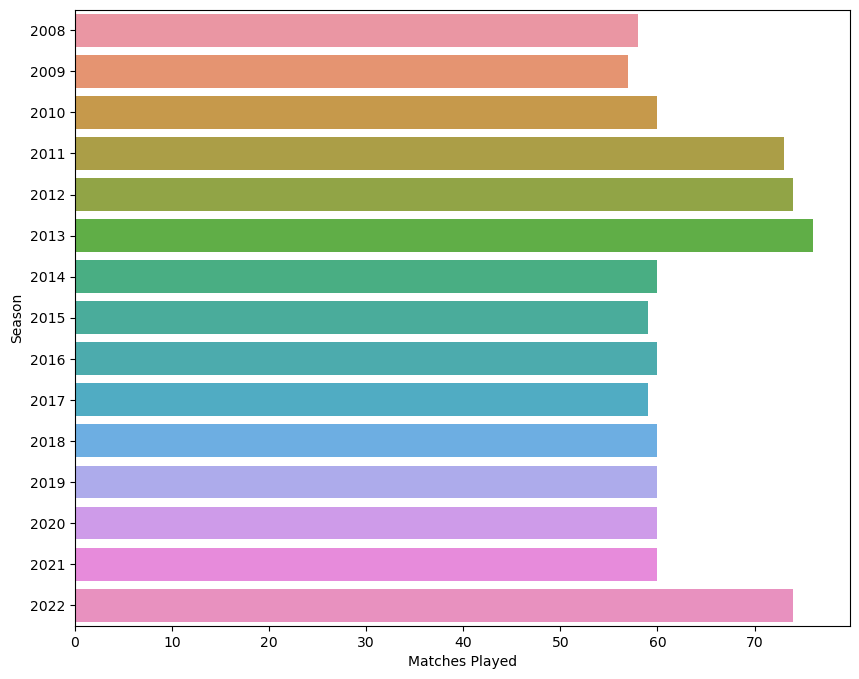

In [45]:
plt.figure(figsize=(10,8))
data = edadf.groupby(['ID','Season']).count().index.droplevel(level=0).value_counts().sort_index()
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Season')
plt.show()

In [46]:
data

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
2021    60
2022    74
Name: Season, dtype: int64

### Max Number of matches played in 2013 (76) where as Min number of matches played in 2009 (57)

# Most IPL Matches played in a Venue


Number of matches played at IPL Venues 

Wankhede Stadium                                       104
M.Chinnaswamy Stadium                                   80
Eden Gardens                                            79
MA Chidambaram Stadium                                  67
Rajiv Gandhi International Stadium                      64
Feroz Shah Kotla                                        60
Punjab Cricket Association IS Bindra Stadium            56
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     46
Dr DY Patil Sports Academy                              37
Maharashtra Cricket Association Stadium                 35
Sheikh Zayed Stadium                                    29
Sharjah Cricket Stadium                                 28
Brabourne Stadium                                       27
Arun Jaitley Stadium                                    18
Subrata Roy Sahara Stadium                              16
Kingsmead      

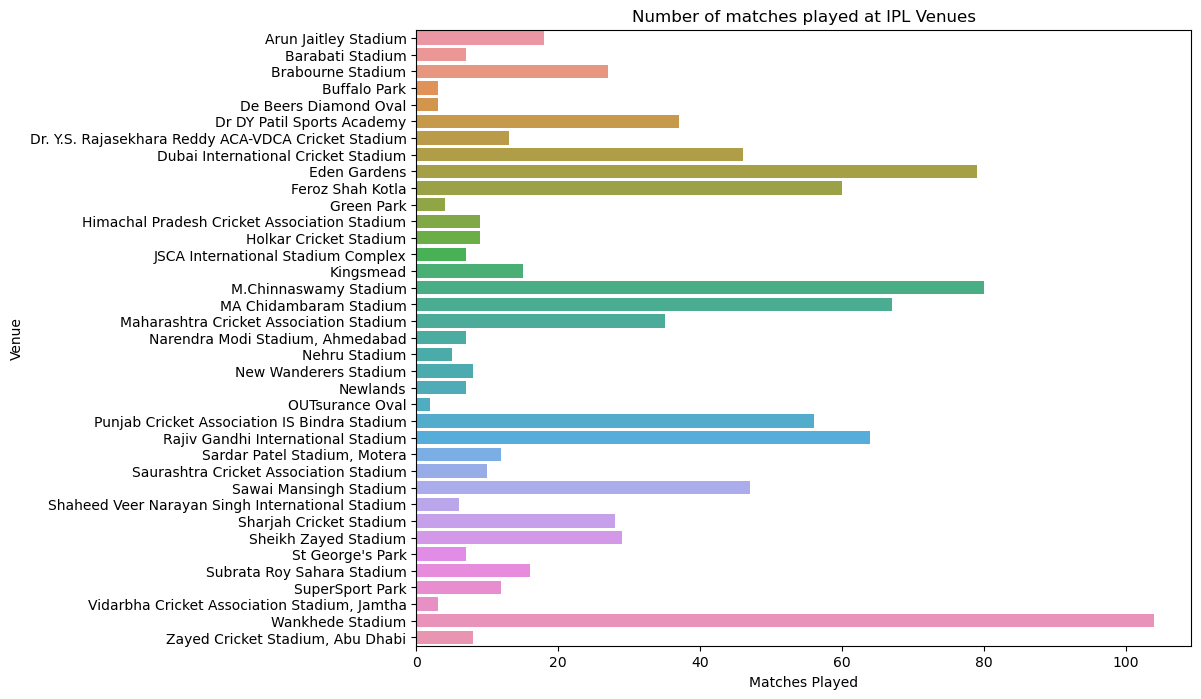

In [47]:
p = edadf.groupby(['Venue','ID']).count().droplevel(level=1).index.value_counts()
print('Number of matches played at IPL Venues \n')
print(p)

# Plotting
plt.figure(figsize=(10,8))
data1 = edadf.groupby(['Venue','ID']).count().droplevel(level=1).index.value_counts().sort_index()
sns.barplot(y=data1.index,x=data1,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Venue')
plt.title('Number of matches played at IPL Venues')
plt.show()


### most of the IPL matches were played in Chennai, Mumbai, Kolkata, Banglore, and Delhi.

# IPL Matches Played by Each Team

Number of matches played by each Team 

Mumbai Indians                 27826
Sunrisers Hyderabad            27230
Royal Challengers Bangalore    26512
Delhi Capitals                 26373
Kolkata Knight Riders          26192
Punjab Kings                   26034
Chennai Super Kings            25128
Rajasthan Royals               22777
Pune Warriors                   5443
Gujarat Lions                   3566
Rising Pune Supergiants         3480
Gujarat Titans                  1971
Lucknow Super Giants            1840
Kochi Tuskers Kerala            1582
Name: BattingTeam, dtype: int64


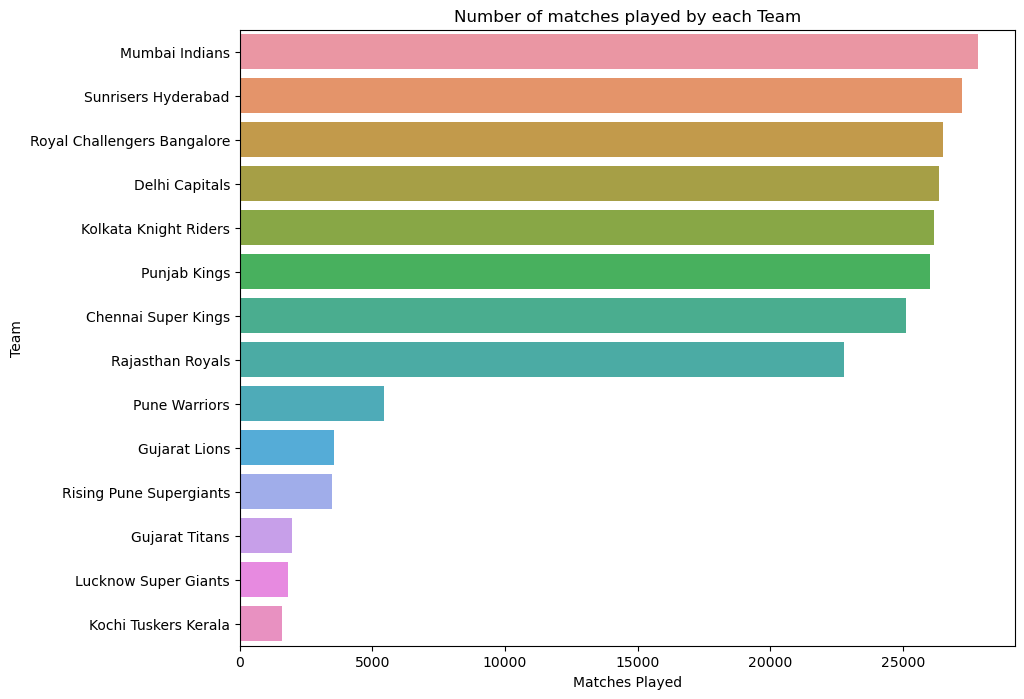

In [48]:
p = edadf['BattingTeam'].value_counts()
print('Number of matches played by each Team \n')
print(p)

# Plotting
plt.figure(figsize=(10,8))
data = edadf['BattingTeam'].value_counts().sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Matches Played')
plt.ylabel('Team')
plt.title('Number of matches played by each Team')
plt.show()

# Which Team had won by maximum runs across Season?

In [49]:
# team details
edadf.iloc[edadf['Margin'].where (edadf.WonBy == 'Runs').idxmax()]


ID                                                             1082635
City                                                             Delhi
Date                                                        2017-05-06
Season                                                            2017
MatchNumber                                                         45
Team1                                                   Delhi Capitals
Team2                                                   Mumbai Indians
Venue                                                 Feroz Shah Kotla
TossWinner                                            Delhi Daredevils
TossDecision                                                     field
SuperOver                                                            N
WinningTeam                                             Mumbai Indians
WonBy                                                             Runs
Margin                                                           146.0
method

In [50]:
d = edadf[edadf.WonBy == 'Runs'].Margin.max()
edadf[edadf.Margin == d].groupby('Season')['WinningTeam'].value_counts()

Season  WinningTeam   
2017    Mumbai Indians    211
Name: WinningTeam, dtype: int64

In [51]:
edadf.iloc[edadf['Margin'].where (edadf.WonBy == 'Runs').idxmax()].WinningTeam

'Mumbai Indians'

In [52]:
# lets get the list of all win teams by season who got max margin in runs
d = edadf[edadf.WonBy == 'Runs'].Margin.max()
edadf[edadf.Margin == d].groupby('Season')['WinningTeam'].value_counts()

Season  WinningTeam   
2017    Mumbai Indians    211
Name: WinningTeam, dtype: int64

# Which Team had won by maximum wickets?


In [53]:
edadf.iloc[edadf['Margin'].where (edadf.WonBy == 'Wickets').idxmax()]

ID                                                              335994
City                                                            Mumbai
Date                                                        2008-04-27
Season                                                            2008
MatchNumber                                                         14
Team1                                                   Mumbai Indians
Team2                                              Sunrisers Hyderabad
Venue                                       Dr DY Patil Sports Academy
TossWinner                                             Deccan Chargers
TossDecision                                                     field
SuperOver                                                            N
WinningTeam                                        Sunrisers Hyderabad
WonBy                                                          Wickets
Margin                                                            10.0
method

In [54]:
edadf.iloc[edadf['Margin'].where (edadf.WonBy == 'Wickets').idxmax()].WinningTeam

'Sunrisers Hyderabad'

In [55]:
# lets get the list of all win teams by season who got max margin in wkts
d = edadf[edadf.WonBy == 'Wickets'].Margin.max()
edadf[edadf.Margin == d].groupby('Season')['WinningTeam'].value_counts()

Season  WinningTeam                
2008    Rajasthan Royals               248
        Delhi Capitals                 243
        Sunrisers Hyderabad            202
2009    Delhi Capitals                 108
2010    Sunrisers Hyderabad            242
        Royal Challengers Bangalore    195
2011    Sunrisers Hyderabad            249
        Rajasthan Royals               203
        Kolkata Knight Riders          186
2012    Mumbai Indians                 250
        Chennai Super Kings            245
2013    Chennai Super Kings            227
2014    Rajasthan Royals               249
2015    Royal Challengers Bangalore    181
2016    Delhi Capitals                 251
        Sunrisers Hyderabad            217
2017    Royal Challengers Bangalore    249
        Kolkata Knight Riders          218
        Punjab Kings                   157
2018    Rajasthan Royals               146
        Royal Challengers Bangalore    145
2019    Royal Challengers Bangalore    253
2020    Kolkata Kn

# Which Team had won by (closest margin) minimum runs?


In [56]:
# lets get the list of all win teams by season who got min margin in runs that is 1
d = edadf[edadf.WonBy == 'Runs'].Margin.min()
edadf[edadf.Margin == d].groupby('Season')['WinningTeam'].value_counts()

Season  WinningTeam                
2008    Punjab Kings                   249
2009    Punjab Kings                   250
2012    Mumbai Indians                 249
        Delhi Capitals                 247
2015    Chennai Super Kings            248
        Kolkata Knight Riders          246
2016    Royal Challengers Bangalore    246
        Gujarat Lions                  242
2017    Mumbai Indians                 248
2018    Chennai Super Kings            246
        Sunrisers Hyderabad            245
2019    Mumbai Indians                 247
        Royal Challengers Bangalore    245
2021    Royal Challengers Bangalore    244
Name: WinningTeam, dtype: int64

# Which Team had won by minimum wickets?


In [57]:
# lets get the list of all win teams by season who got min margin in wkts that is 1
d = edadf[edadf.WonBy == 'Wickets'].Margin.min()
edadf[edadf.Margin == d].groupby('Season')['WinningTeam'].value_counts()

Season  WinningTeam                
2008    Punjab Kings                   249
2009    Punjab Kings                   250
2012    Mumbai Indians                 249
        Delhi Capitals                 247
2015    Chennai Super Kings            248
        Kolkata Knight Riders          246
2016    Royal Challengers Bangalore    246
        Gujarat Lions                  242
2017    Mumbai Indians                 248
2018    Chennai Super Kings            246
        Sunrisers Hyderabad            245
2019    Mumbai Indians                 247
        Royal Challengers Bangalore    245
2021    Royal Challengers Bangalore    244
Name: WinningTeam, dtype: int64

# Has Toss-winning helped in Match-winning?


In [58]:
edadf.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'byes', 'legbyes', 'noballs',
       'penalty', 'wides'],
      dtype='object')

In [59]:
d = matches.TossWinner == matches.WinningTeam
p = d.groupby(d).count()
p

False    556
True     394
dtype: int64

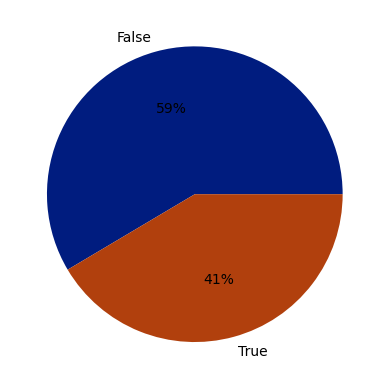

In [60]:
colors = sns.color_palette('dark')
plt.pie(p, labels=p.index ,colors = colors, autopct = '%0.0f%%')
plt.show()

# IPL matches hosted in various cities

In [61]:
matches.City.unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Kanpur', 'Rajkot', 'Raipur', 'Ranchi', 'Cuttack',
       'Dharamsala', 'Kochi', 'Nagpur', 'Johannesburg', 'Centurion',
       'Durban', 'Bloemfontein', 'Port Elizabeth', 'Kimberley',
       'East London', 'Cape Town'], dtype=object)

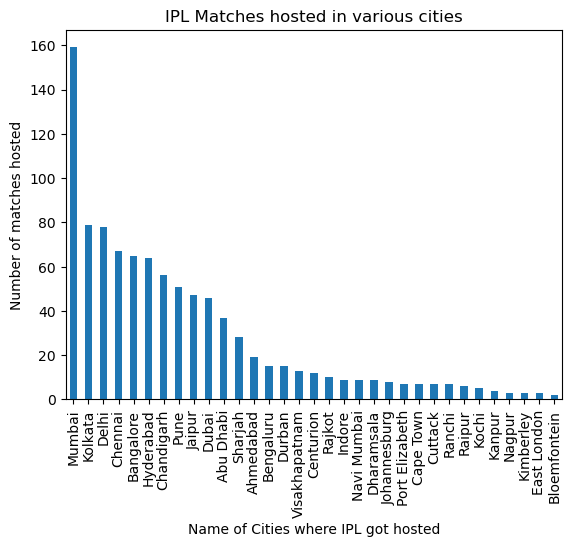

In [62]:
city_match_count = matches.City.value_counts()

colors = sns.color_palette('viridis',24)
city_match_count.plot(kind = 'bar')
plt.ylabel("Number of matches hosted")
plt.xlabel("Name of Cities where IPL got hosted")
plt.title("IPL Matches hosted in various cities");


# Number of matches won by batting first or fielding first

Number of matches won by choosing fielding first:  509
Number of matches won by  batting first:  423


Text(0.5, 1.0, 'Matches Won - Batting First vs Fielding First')

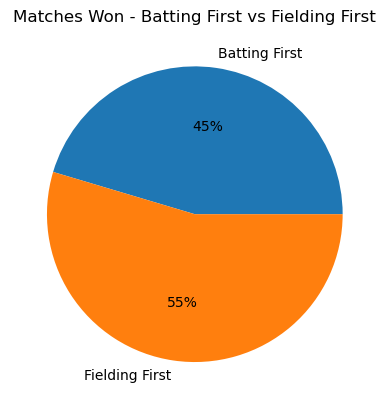

In [63]:
# Count the number of matches won by fielding first 
number_of_matches_won_fielding_first = matches[matches.WonBy == "Wickets"].count()['WonBy']

# Count the number of matches won by batting first
number_of_matches_won_batting_first = matches[matches.WonBy == "Runs"].count()['WonBy']

print('Number of matches won by choosing fielding first: ',number_of_matches_won_fielding_first)
print('Number of matches won by  batting first: ',number_of_matches_won_batting_first)

plt.pie([number_of_matches_won_batting_first, number_of_matches_won_fielding_first], labels = ["Batting First", "Fielding First"],autopct = '%0.0f%%')
plt.title("Matches Won - Batting First vs Fielding First")

### Here what we see is the percentage of matches won by doing batting or fielding and it may or may not be a choice. For example, if team A wins toss and decides to bat and looses the match then the above stat will include Team B in matches won by fielding first but though it was not Team B's choice.

# Toss Decision and Winning chance

In [64]:
match_win_target = match_loss_target = match_win_chassing = match_loss_chassing = 0 
for i in range(len(matches)) : 
    if matches.TossDecision.iloc[i] == 'bat' :    # target diya
        if matches.TossWinner.iloc[i] == matches.WinningTeam.iloc[i] : 
            match_win_target += 1
        else :
            match_loss_target += 1
    else :          # target chase kiya or Fielding li
        if matches.TossWinner.iloc[i] == matches.WinningTeam.iloc[i] : 
            match_win_chassing += 1
        else :
            match_loss_chassing += 1
print('{} times captain choose batting option and win the match.'.format(match_win_target))
print('{} times captain choose batting option but loose the match.'.format(match_loss_target))
print('{} times captain choose fielding option and win the match.'.format(match_win_chassing))
print('{} times captain choose fielding option but loose the match.'.format(match_loss_chassing))

131 times captain choose batting option and win the match.
220 times captain choose batting option but loose the match.
263 times captain choose fielding option and win the match.
336 times captain choose fielding option but loose the match.


Text(0.5, 1.0, 'Toss Decision and Match Outcome')

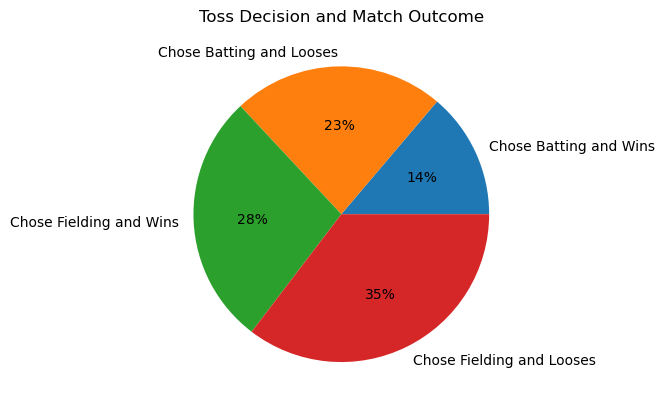

In [65]:
plt.pie([match_win_target,match_loss_target,match_win_chassing,match_loss_chassing], labels = ["Chose Batting and Wins", "Chose Batting and Looses","Chose Fielding and Wins", "Chose Fielding and Looses"],autopct = '%0.0f%%')
plt.title("Toss Decision and Match Outcome")

# Analysis on Stadium on Toss Decision and Match Outcome

In [66]:
# adding the above data as new columns: Target & Chase
# df.loc[df.index[someRowNumber], 'New Column Title'] = "some value" iloc doesnot work
for i in range(len(matches)) : 
    if matches.TossDecision.iloc[i] == 'bat' :    
        if matches.TossWinner.iloc[i] == matches.WinningTeam.iloc[i] : 
            # captain choose batting option and win the match then it will count as target.
            matches.loc[matches.index[i],'target'] = 1       
        else :
            # captain choose batting option and loose the match then it will count as chasing.
            matches.loc[matches.index[i],'chase'] = 1   
    else :          
        if matches.TossWinner.iloc[i] == matches.WinningTeam.iloc[i] : 
            # captain choose fielding option and win the match then it will count in chasing.
            matches.loc[matches.index[i],'chase'] = 1   
        else :
            # captain choose fielding option and loose the match then it will count in target.
            matches.loc[matches.index[i],'target'] = 1

In [67]:
targetlist = []
chaselist = []
for i in matches.Venue.unique() : 
    print('Analysis on "{} Stadium"'.format(i))
    x = np.sum(matches[matches.Venue == i].target)
    y = np.sum(matches[matches.Venue == i].chase)
    print(x, 'times team gave good target and win the match.')
    print(y, 'times team easily chase the score and win the match.') 
    targetlist.append(x)
    chaselist.append(y)
    print()


Analysis on "Narendra Modi Stadium, Ahmedabad Stadium"
2.0 times team gave good target and win the match.
5.0 times team easily chase the score and win the match.

Analysis on "Eden Gardens Stadium"
34.0 times team gave good target and win the match.
45.0 times team easily chase the score and win the match.

Analysis on "Wankhede Stadium Stadium"
49.0 times team gave good target and win the match.
55.0 times team easily chase the score and win the match.

Analysis on "Brabourne Stadium Stadium"
14.0 times team gave good target and win the match.
13.0 times team easily chase the score and win the match.

Analysis on "Dr DY Patil Sports Academy Stadium"
20.0 times team gave good target and win the match.
17.0 times team easily chase the score and win the match.

Analysis on "Maharashtra Cricket Association Stadium Stadium"
22.0 times team gave good target and win the match.
13.0 times team easily chase the score and win the match.

Analysis on "Dubai International Cricket Stadium Stadium

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


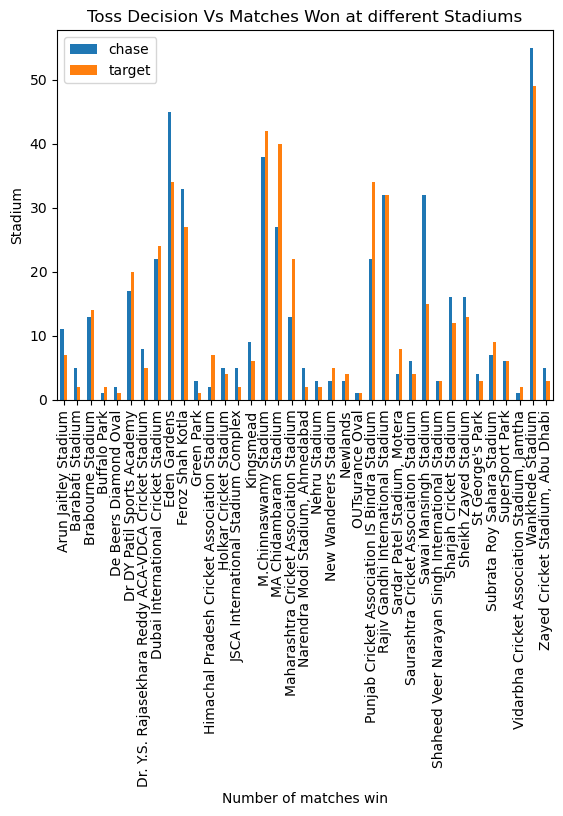

In [68]:
# getting counts of target and chase venue wise and plotting
p = matches.groupby(['Venue'])['chase','target'].count()
p.plot.bar()
plt.xlabel('Number of matches win')
plt.ylabel('Stadium')
plt.title('Toss Decision Vs Matches Won at different Stadiums')
plt.show()

In [69]:
# p.chase = p.chase.astype(int)
# p.target = p.target.astype(int)
p.total_win = p.chase + p.target
p['chase_win'] = (p.chase / p.total_win) * 100
p['target_win'] = (p.target / p.total_win) * 100
p

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,chase,target,chase_win,target_win
Venue,,,,
Arun Jaitley Stadium,11,7,61.111111,38.888889
Barabati Stadium,5,2,71.428571,28.571429
Brabourne Stadium,13,14,48.148148,51.851852
Buffalo Park,1,2,33.333333,66.666667
De Beers Diamond Oval,2,1,66.666667,33.333333
Dr DY Patil Sports Academy,17,20,45.945946,54.054054
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,8,5,61.538462,38.461538
Dubai International Cricket Stadium,22,24,47.826087,52.173913
Eden Gardens,45,34,56.962025,43.037975


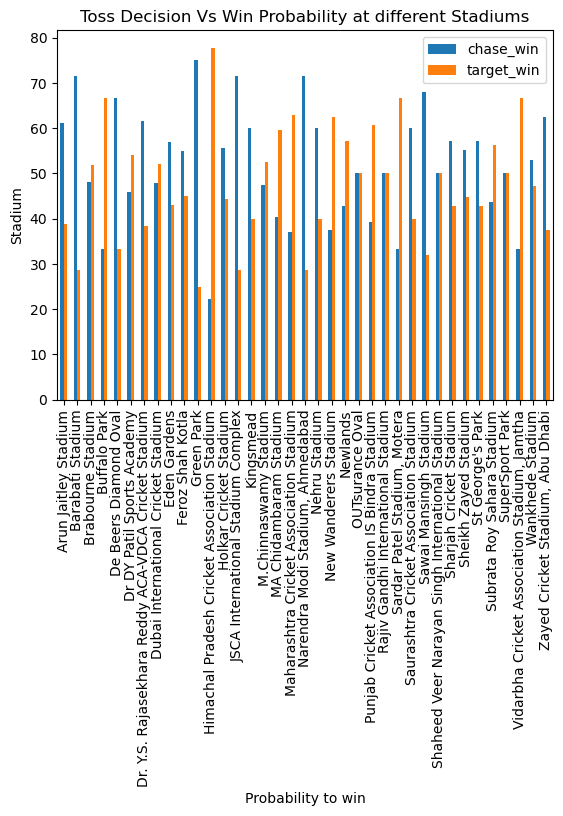

In [70]:
p[['chase_win','target_win']].plot.bar()
plt.xlabel('Probability to win')
plt.ylabel('Stadium')
plt.title('Toss Decision Vs Win Probability at different Stadiums')
plt.show()

# How many matches were tied or with no result in all IPL Seasons

In [71]:
tie_count = matches[matches.WonBy == 'SuperOver'].WonBy.count()
NR_count = matches[matches.WonBy == 'NoResults'].WonBy.count()
print('Number of matches that were Tie in all IPL: ',tie_count)
print('Number of matches that were No Result in all IPL: ',NR_count)

Number of matches that were Tie in all IPL:  14
Number of matches that were No Result in all IPL:  4


In [72]:
edadf.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'byes', 'legbyes', 'noballs',
       'penalty', 'wides'],
      dtype='object')

# Team's Winning Proportion Each Year

In [73]:
edadf.isna().sum()

ID                        0
City                      0
Date                      0
Season                    0
MatchNumber               0
Team1                     0
Team2                     0
Venue                     0
TossWinner                0
TossDecision              0
SuperOver               372
WinningTeam             372
WonBy                     0
Margin                 4006
method               222746
Player_of_Match         372
Team1Players              0
Team2Players              0
Umpire1                   0
Umpire2                   0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
byes                

Season : 2008 < ================================================== >


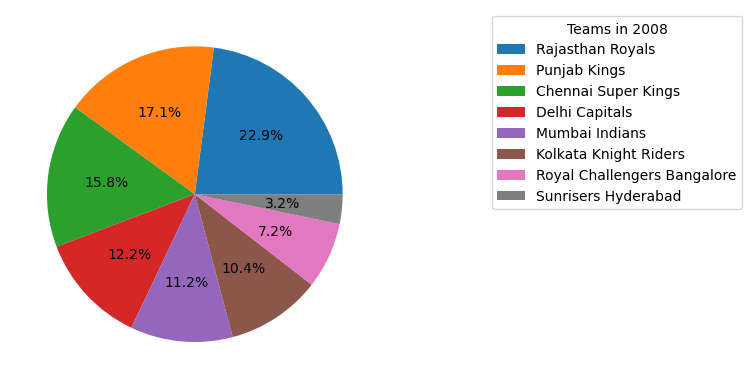

Season : 2009 < ================================================== >


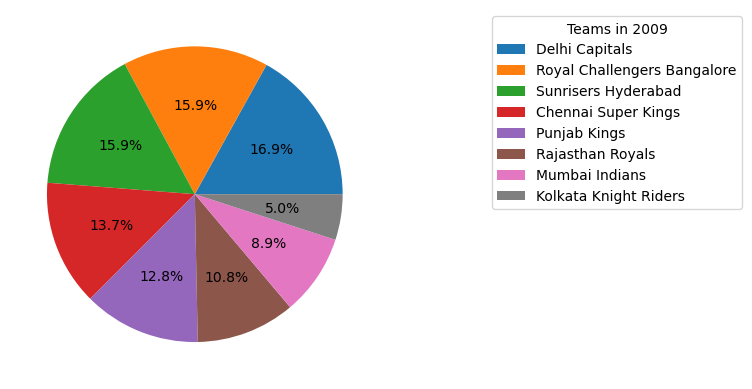

Season : 2010 < ================================================== >


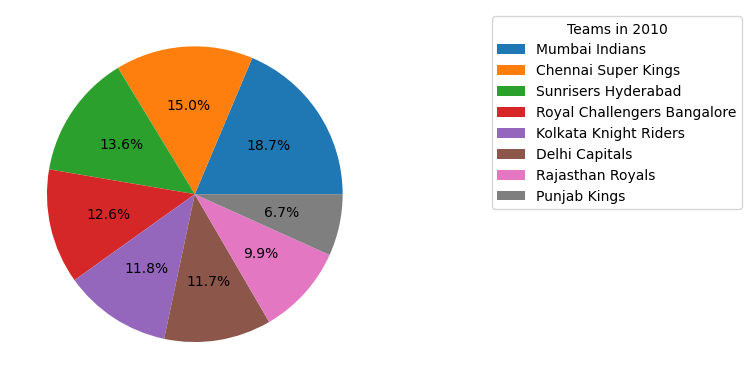

Season : 2011 < ================================================== >


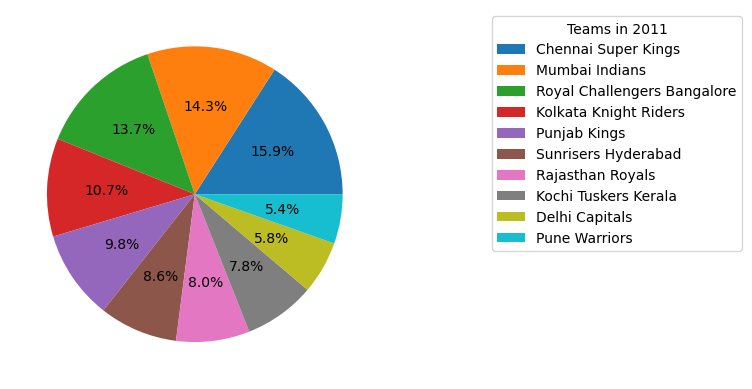

Season : 2012 < ================================================== >


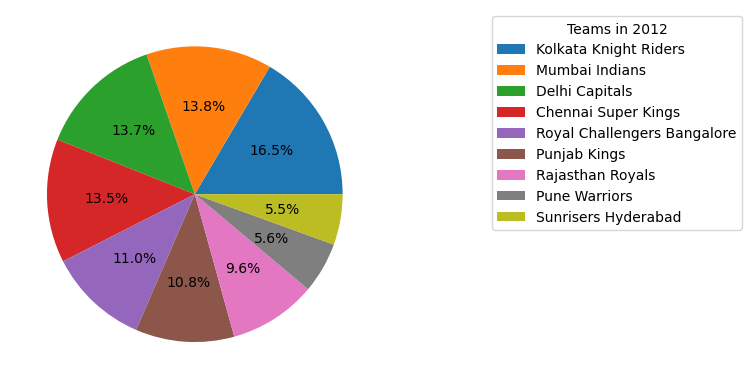

Season : 2013 < ================================================== >


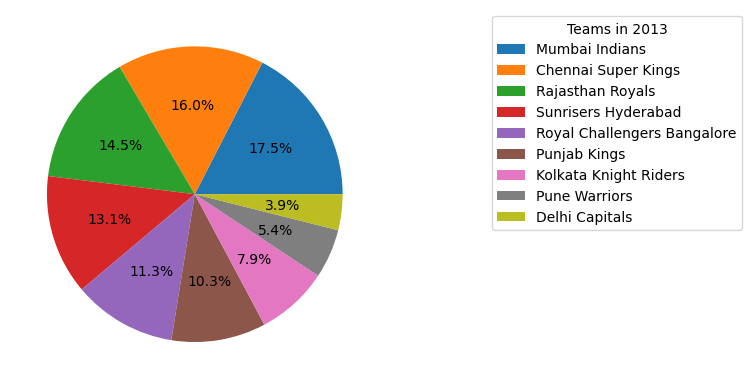

Season : 2014 < ================================================== >


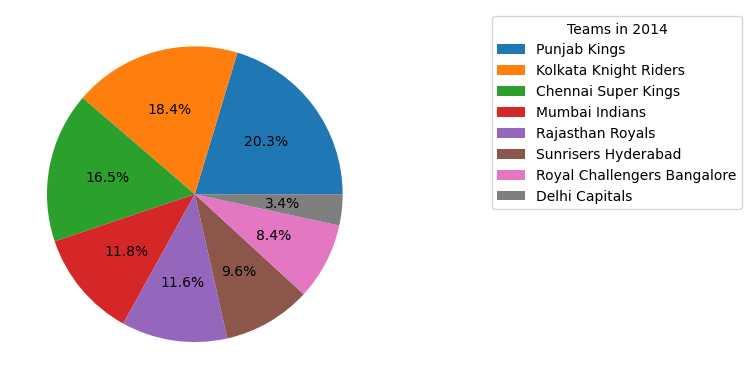

Season : 2015 < ================================================== >


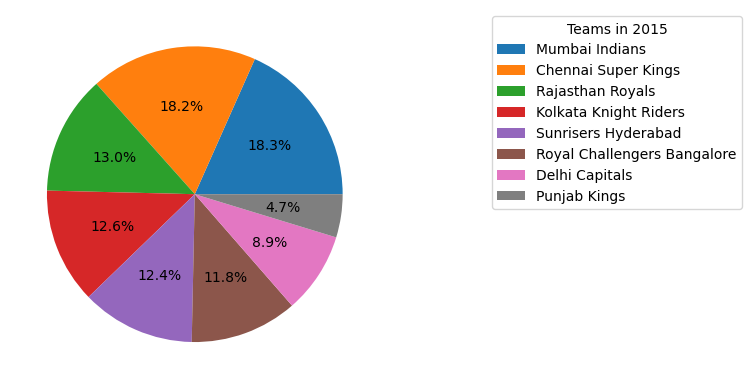

Season : 2016 < ================================================== >


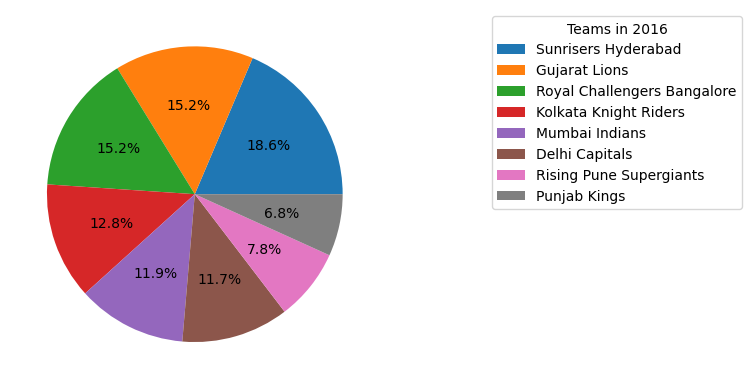

Season : 2017 < ================================================== >


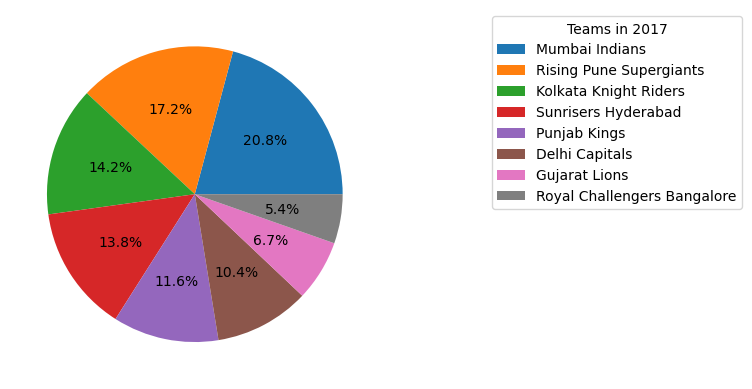

Season : 2018 < ================================================== >


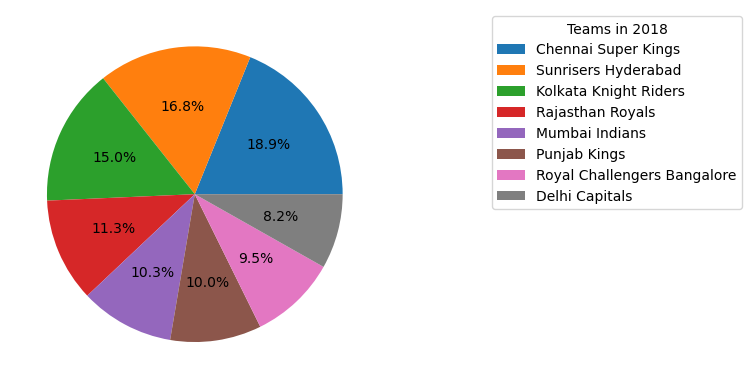

Season : 2019 < ================================================== >


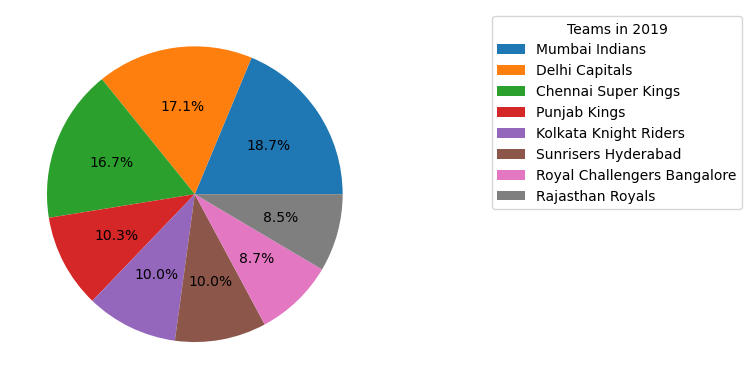

Season : 2020 < ================================================== >


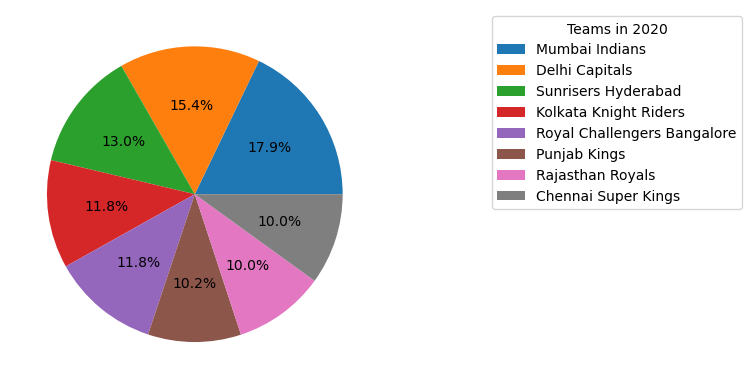

Season : 2021 < ================================================== >


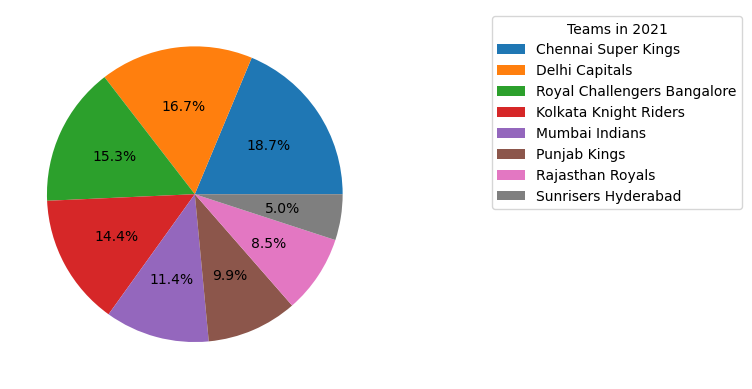

Season : 2022 < ================================================== >


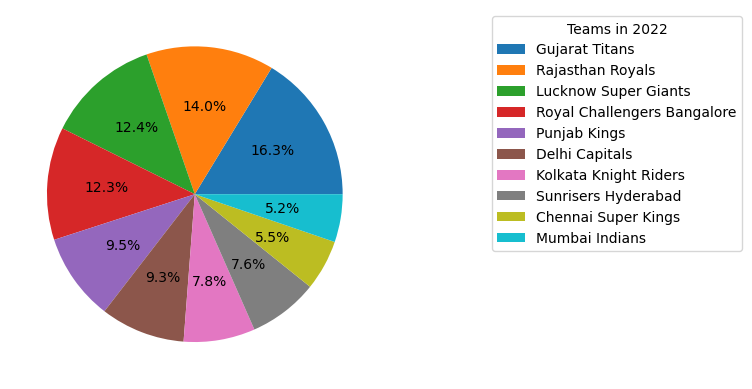

In [74]:
#using for loop for selecting each year from the list of the years
for i in edadf.Season.unique():
    print("Season :", i,'<', '='*50,'>')
    xdf=edadf[edadf.Season==i] #conditioning over the year
    xdf=xdf[xdf.WinningTeam!=0] #removing rows of superovers were winteam is null
    plt.pie(xdf.WinningTeam.value_counts(),autopct="%1.1f%%" ) #plotting pie chart of the winner's value counts
    plt.legend(xdf.WinningTeam.value_counts().index,bbox_to_anchor=(2,1),loc='upper right', title='Teams in {}'.format(i))
    plt.show();

### From these plots, one can easily analyse the dominance of each team over a season and check the growth of the teams as season progress.

# Run Scored per Over


In [75]:
edadf.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'byes', 'legbyes', 'noballs',
       'penalty', 'wides'],
      dtype='object')

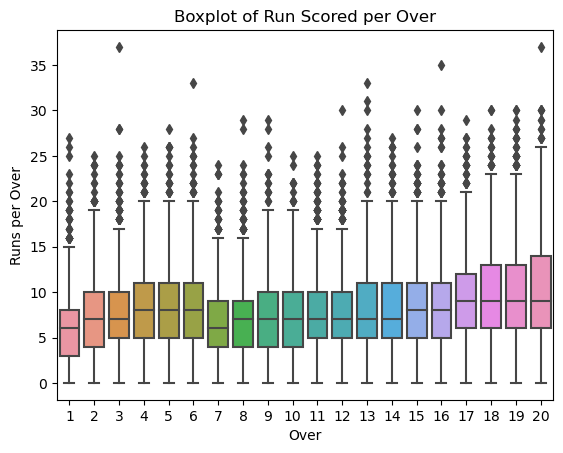

In [76]:
#grouping with conditions
xd=edadf.groupby(['ID', 'overs','innings'], as_index=False)['total_run'].sum()

#changing the range of overs from 0-19 to 1-20
xd['overs']=xd['overs']+1

#boxplot for distribution
sns.boxplot(y=xd['total_run'], x=xd['overs'])
plt.title('Boxplot of Run Scored per Over')
plt.ylabel('Runs per Over')
plt.xlabel('Over');

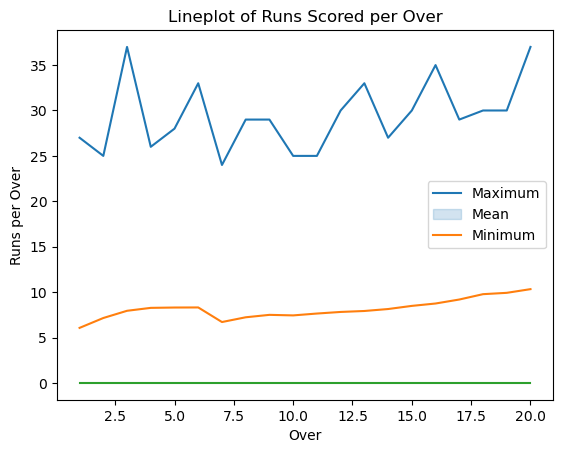

In [77]:
#grouping for finding maximum, minimum and mean
minimum=xd.groupby('overs', as_index=False)['total_run'].min()
maximum=xd.groupby('overs', as_index=False)['total_run'].max()
mean=xd.groupby('overs', as_index=False)['total_run'].mean()

#plotting lineplot with maximum, minmum and mean
sns.lineplot(data=maximum, x='overs', y='total_run')
sns.lineplot(data=mean, x='overs', y='total_run')
sns.lineplot(data=minimum, x='overs', y='total_run')
plt.legend(['Maximum', 'Mean', 'Minimum'])
plt.title('Lineplot of Runs Scored per Over')
plt.xlabel('Over')
plt.ylabel('Runs per Over');

### The plot explains that during powerplay, batsmen play vividly thus increaing runs per over as they are able to confidently hit. At 6th over, there is a decline and then gradualy catches the pace.

# Teams with Most Wins At A Venue

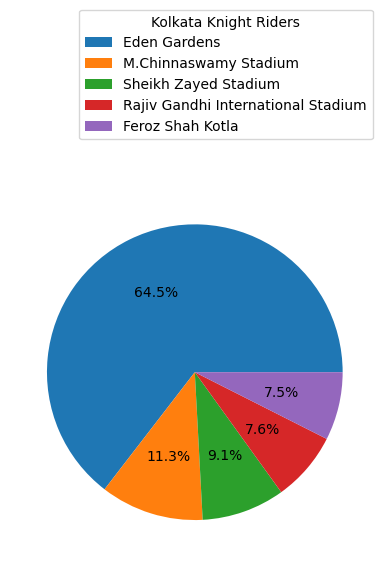

****************************************************************************************************


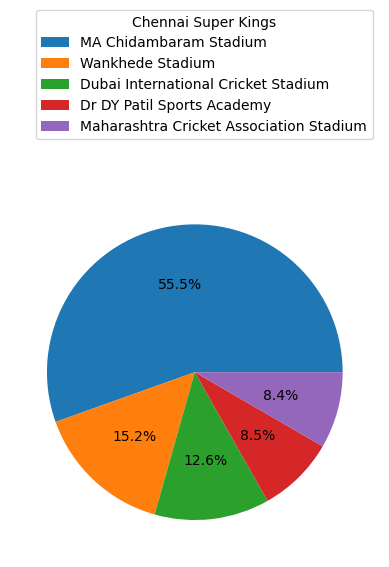

****************************************************************************************************


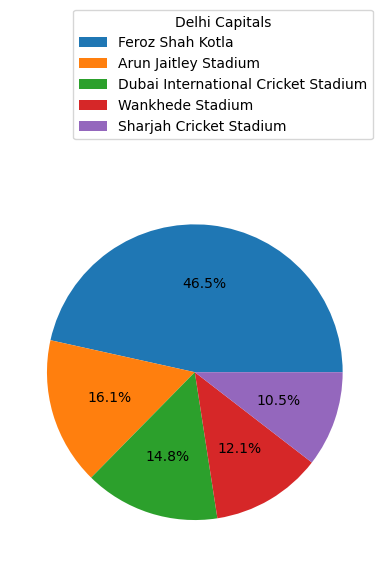

****************************************************************************************************


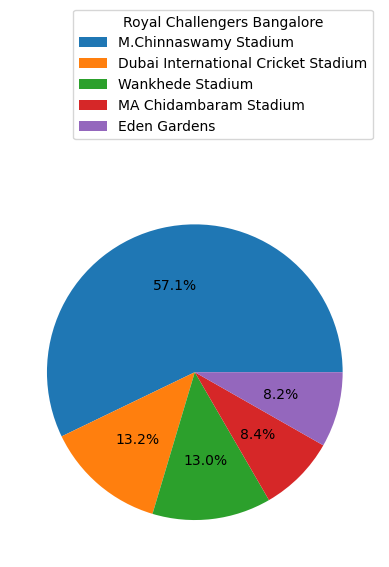

****************************************************************************************************


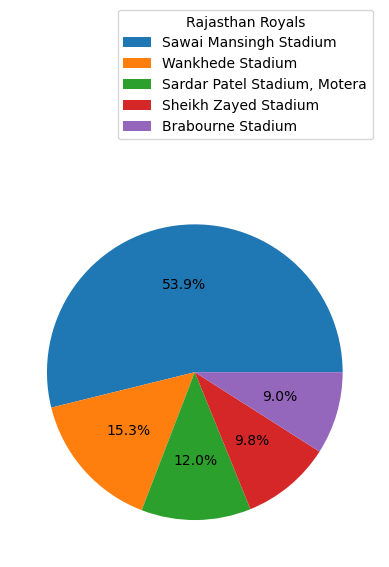

****************************************************************************************************


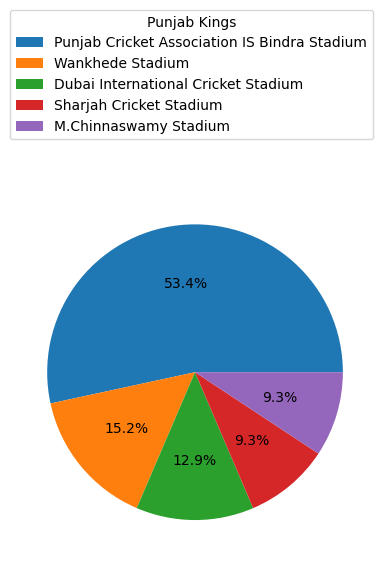

****************************************************************************************************


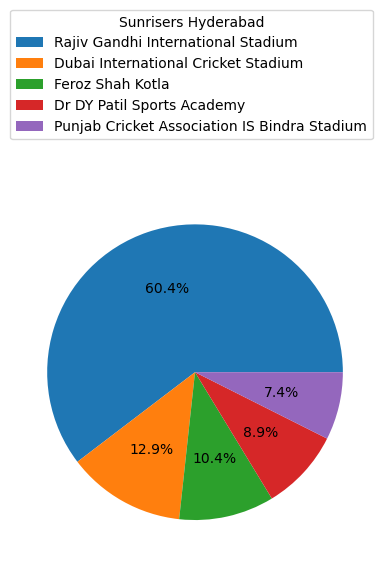

****************************************************************************************************


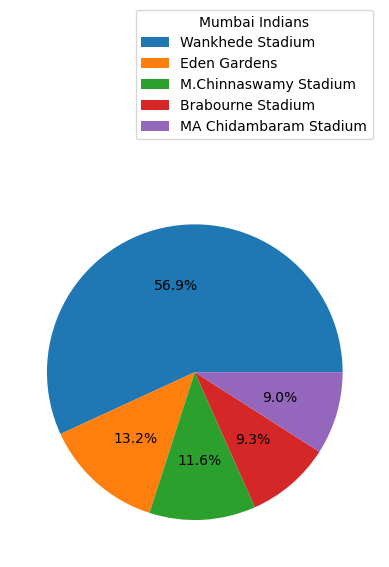

****************************************************************************************************


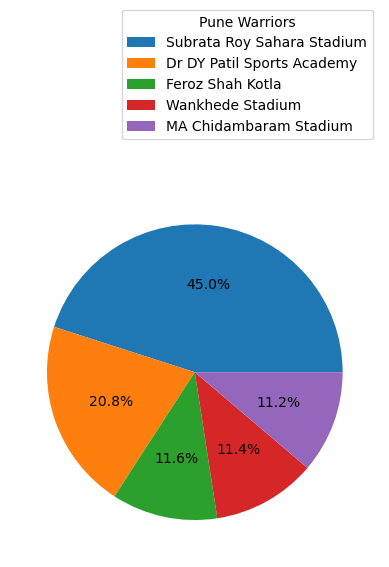

****************************************************************************************************


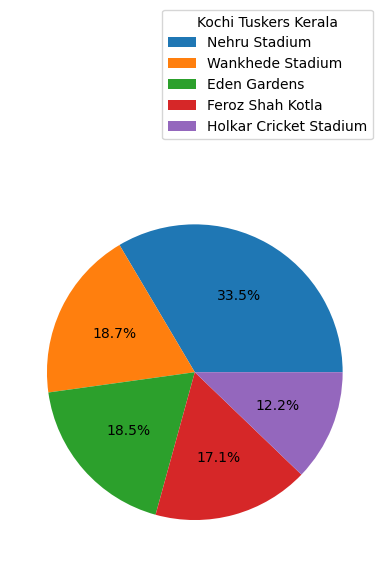

****************************************************************************************************


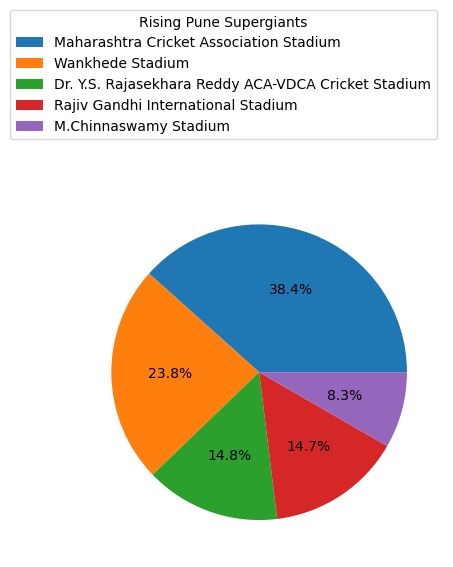

****************************************************************************************************


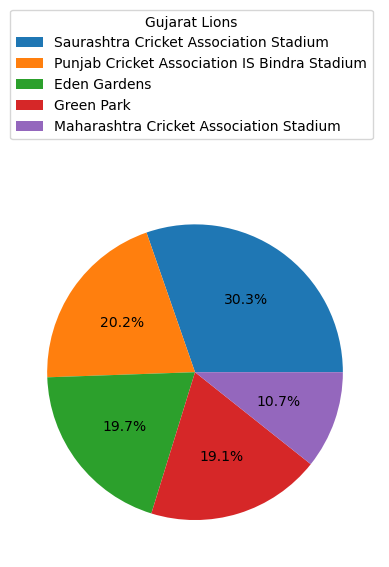

****************************************************************************************************


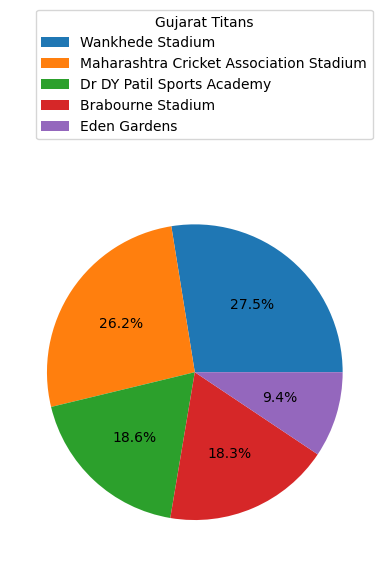

****************************************************************************************************


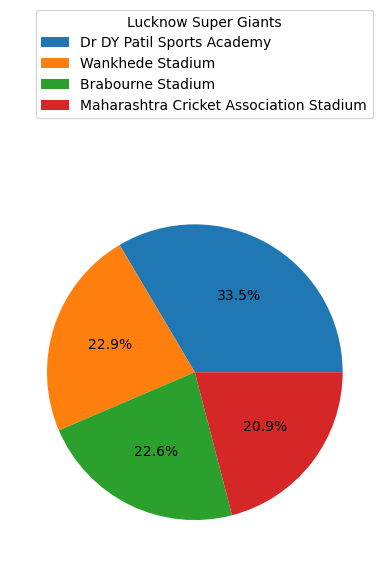

****************************************************************************************************


In [78]:
#using for loop for selecting each team from the list of unique winner teams
pdf = edadf.dropna(axis=0, how='all', subset=['WinningTeam'])
for i in pdf.WinningTeam.unique():
    xdf=pdf[pdf.WinningTeam==i] #conditioning over winning
    plt.pie(xdf.Venue.value_counts().head(5),autopct="%1.1f%%" ) #using piechart for plotting with value counts over
    plt.legend(xdf.Venue.value_counts().head(5).index, bbox_to_anchor=(1,1.5),loc='upper right', title=i)
    plt.show()
    print("*"*100);

### Most of the teams have won most matches on their homegrouds. Though, while selecting stadium, half of the matches from the season take place at the homeground and other half at the homeground of each opponent teams. So, we cannot judge them right now

# Does playing on the homeground has any advantages

In [79]:
#gives homeground of each team
#i.e. the ground where half of their matches for the season take place
homeground={}
for i in pdf.WinningTeam.unique():
    xdf=pdf[pdf.WinningTeam==i]
    homeground[i]=xdf.Venue.value_counts().head(1).index[0]

#gives number of matches played by each team on their homeground
teams_played={}
for i in homeground:
    xd=pdf[pdf.Venue==homeground[i]]
    teams_played[i]=len(xd)

#gives the number of matches won by each team on their homeground
teams_won={}
for i in homeground:
    xd=pdf.loc[(pdf['Venue']==homeground[i]) & (pdf['WinningTeam']==i)]
    teams_won[i]=len(xd)

#win percentage of each team on their homeground
win_percentage={}
for i in homeground:
    win_percentage[i]=(teams_won[i]/teams_played[i])*100
win_percentage

{'Kolkata Knight Riders': 56.57439446366782,
 'Chennai Super Kings': 59.48260045257171,
 'Delhi Capitals': 39.43976380787787,
 'Royal Challengers Bangalore': 47.098164934777806,
 'Rajasthan Royals': 67.96412556053811,
 'Punjab Kings': 52.73946793277564,
 'Sunrisers Hyderabad': 52.13304410701374,
 'Mumbai Indians': 42.10421559651288,
 'Pune Warriors': 25.620915032679736,
 'Kochi Tuskers Kerala': 38.35497835497835,
 'Rising Pune Supergiants': 13.691466603280247,
 'Gujarat Lions': 30.02939941201176,
 'Gujarat Titans': 2.945742605787986,
 'Lucknow Super Giants': 8.338952573612048}

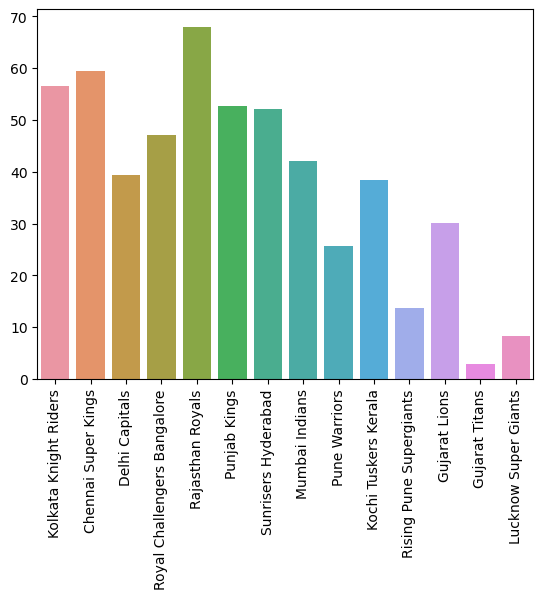

In [80]:
#assigning values to the variables
y=list(win_percentage.values())
x=list(win_percentage.keys())

#plotting barplot of win % with above values
sns.barplot(x=x,y=y)
plt.xticks(rotation=90);

### Most of the teams have less than 50% win rate at home grounds.

# Who are the top 10 fielders?

In [81]:
#using filtering over dataset
fd=pdf[(pdf.kind=='caught')]['fielders_involved'].value_counts().head(10)
fd

MS Dhoni          135
KD Karthik        132
AB de Villiers    120
SK Raina          106
KA Pollard         97
RG Sharma          96
S Dhawan           93
V Kohli            92
RV Uthappa         92
RA Jadeja          84
Name: fielders_involved, dtype: int64

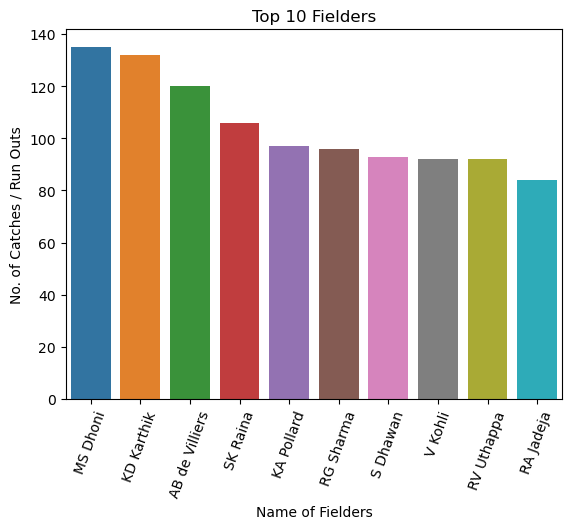

In [82]:
sns.barplot(x=fd.index, y=fd)
plt.title('Top 10 Fielders')
plt.xlabel('Name of Fielders')
plt.ylabel('No. of Catches / Run Outs')
plt.xticks(rotation=70);

### Among the top 10 fielders, top 2 are wicket-keepers so get most of the balls. So, if we consider the entire field, AB de Villiers is among the top fielders.

# Compare the team clashes
#### User inputs 2 Teams and it shows all the statistics of clashes between them

In [83]:
# BowlingTeam column creation
edadf['BowlingTeam'] = edadf['BattingTeam']
edadf.loc[edadf['BattingTeam'] == edadf['Team1'], 'BowlingTeam'] = edadf['Team2']
edadf.loc[edadf['BattingTeam'] == edadf['Team2'], 'BowlingTeam'] = edadf['Team1']

In [84]:
#currrent score column creation
edadf["current_score"]=edadf.groupby("ID").cumsum()["total_run"]

# Runs left column creation
edadf["runs_left"]=edadf["total_run"] - edadf["current_score"]
# +1 was ther in above which we didnt do

# Balls left column creation
edadf["balls_left"]=126 - edadf["overs"]*6 - edadf["ballnumber"]

# wickets left column creation
wickets = edadf.groupby('ID').cumsum()['isWicketDelivery'].values
edadf['wickets_left'] = 10 - wickets

# current run rate column creation
edadf['crr'] = (edadf['current_score']*6)/(120 - edadf['balls_left'])

# req run rate column creation
edadf['rrr'] = (edadf['runs_left']*6)/edadf['balls_left']

# Result column  creation
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

edadf['result'] = edadf.apply(result,axis=1)

In [85]:
# counting venues where crr >= rrr which means nice pitch for batting
# grouing based on team further
edadf[edadf.crr >= edadf.rrr].groupby('Venue')['ID'].count()

Venue
Arun Jaitley Stadium                                    4154
Barabati Stadium                                        1625
Brabourne Stadium                                       6256
Buffalo Park                                             685
De Beers Diamond Oval                                    696
Dr DY Patil Sports Academy                              8528
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     2907
Dubai International Cricket Stadium                    10734
Eden Gardens                                           17707
Feroz Shah Kotla                                       13355
Green Park                                               881
Himachal Pradesh Cricket Association Stadium            2069
Holkar Cricket Stadium                                  1875
JSCA International Stadium Complex                      1601
Kingsmead                                               3493
M.Chinnaswamy Stadium                                  17596
MA Chidambaram Sta

In [86]:
edadf.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'byes', 'legbyes', 'noballs',
       'penalty', 'wides', 'BowlingTeam', 'current_score', 'runs_left',
       'balls_left', 'wickets_left', 'crr', 'rrr', 'result'],
      dtype='object')

In [87]:
#definabsing the function that takes input as the names of the teams
#and returns all the stats from their clashes
#it also plot the stats in the form of bar plot for us to see the comparative relationship clearly
def team_comparison(team1, team2):
    #creating object for storing plots
    fig, axes = plt.subplots(2, 3, figsize=(16, 8))
    
    #finding the number of clahses and wins by eacm team
    xd=edadf[((edadf.Team1==team1)&(edadf.Team2==team2))|((edadf.Team1==team2)&(edadf.Team2==team1))]
    win=xd.WinningTeam.value_counts()
    print('Total Clashes :', len(xd))
    print('*'*50)
    print('Wins by Each Team :')
    print(win)
    print('*'*50)
    print('Winning Chances (in %)')
    print((win/len(xd))*100)
    print('*'*50)
    
    #finding highest and lowest scores of the clash
    cd=edadf[((edadf.Team1==team1)&(edadf.Team2==team2))|((edadf.Team1==team2)&(edadf.Team2==team1))]
    cd=cd.groupby(['ID','innings'], as_index=False)['total_run'].sum()
    maxi=cd['total_run'].max()
    maxi_run=cd[cd.total_run==maxi]
    high_scorer=edadf[(edadf.ID==maxi_run['ID'].iloc[0]) &(edadf.innings==maxi_run['innings'].iloc[0])]['BattingTeam'].iloc[0]
    mini=cd['total_run'].min()
    mini_run=cd[cd.total_run==mini]
    low_scorer=edadf[(edadf.ID==mini_run['ID'].iloc[0]) &(edadf.innings==mini_run['innings'].iloc[0])]['BattingTeam'].iloc[0]
    print(high_scorer,'has the highest score of', maxi,'runs in the clash.')
    print(low_scorer, 'has the lowest score of', mini,'runs in the clash.')
    print('*'*50)
    
    #finding total runs, top scorers, number of 4's and 6's by team1
    #and total wickets and highest wicket taken by team2
    xdf=edadf[(edadf.BattingTeam==team1) & (edadf.BowlingTeam==team2)]
    bat_run_4=len(xdf[xdf.batsman_run==4])
    bat_run_6=len(xdf[xdf.batsman_run==6])
    total_runs=xdf['batsman_run'].sum()
    wicket=len(xdf[xdf.isWicketDelivery==1])
    bf=xdf.groupby(['batter'], as_index=False)['batsman_run'].sum().sort_values('batsman_run', ascending=False).head(1)
    run_bf=bf['batsman_run'].iloc[0]
    bf=bf['batter'].iloc[0]
    bwl=xdf.groupby('bowler', as_index=False)['isWicketDelivery'].sum().sort_values('isWicketDelivery', ascending=False).head(1)
    bwl_wick=bwl['isWicketDelivery'].iloc[0]
    bwl=bwl['bowler'].iloc[0]
    print(team1, 'has scored', total_runs, 'runs with',bat_run_4,'4s and',bat_run_6 ,'6s against', team2)
    print('While the top scorer is',bf, 'with',run_bf,'runs.')
    print(team2, 'has taken', wicket,'wickets against',team1)
    print('While the top wicket taker is',bwl,'with',bwl_wick, 'wickets.')
    print('*'*50)
    
    #plots while team1 batting and team2 bowling
    axes[0,0].set_title('Scores of teams')
    axes[0,0].bar(height=total_runs,x=team1)
    axes[0,1].set_title('Wickets of teams')
    axes[0,1].bar(height=wicket,x=team2)
    axes[0,2].set_title('Highest Run Scorer')
    axes[0,2].bar(height=run_bf,x=bf)
    axes[1,0].set_title('Highes Wicket Taker')
    axes[1,0].bar(height=bwl_wick,x=bwl)
    axes[1,1].set_title('Number of 4s')
    axes[1,1].bar(height=bat_run_4,x=team1)
    axes[1,2].set_title('Number of 6s')
    axes[1,2].bar(height=bat_run_6,x=team1)
    
    #finding total runs, top scorers, number of 4's and 6's by team2
    #and total wickets and highest wicket taken by team1
    xdf=edadf[(edadf.BattingTeam==team2) & (edadf.BowlingTeam==team1)]
    bat_run_4=len(xdf[xdf.batsman_run==4])
    bat_run_6=len(xdf[xdf.batsman_run==6])
    total_runs=xdf['batsman_run'].sum()
    wicket=len(xdf[xdf.isWicketDelivery==1])
    bf=xdf.groupby(['batter'], as_index=False)['batsman_run'].sum().sort_values('batsman_run', ascending=False).head(1)
    run_bf=bf['batsman_run'].iloc[0]
    bf=bf['batter'].iloc[0]
    bwl=xdf.groupby('bowler', as_index=False)['isWicketDelivery'].sum().sort_values('isWicketDelivery', ascending=False).head(1)
    bwl_wick=bwl['isWicketDelivery'].iloc[0]
    bwl=bwl['bowler'].iloc[0]
    print(team2, 'has scored', total_runs, 'runs with', bat_run_4,'4s and',bat_run_6 ,'6s against', team1)
    print('While the top scorer is',bf, 'with',run_bf,'runs.')
    print(team1, 'has taken', wicket,'wickets against',team2)
    print('While the top wicket taker is',bwl,'with',bwl_wick, 'wickets.')
    
    #plots while team1 batting and team2 bowling
    axes[0,0].set_title('Scores of teams')
    axes[0,0].bar(height=total_runs,x=team2)
    axes[0,1].set_title('Wickets of teams')
    axes[0,1].bar(height=wicket,x=team1)
    axes[0,2].set_title('Highest Run Scorer')
    axes[0,2].bar(height=run_bf,x=bf)
    axes[1,0].set_title('Highes Wicket Taker')
    axes[1,0].bar(height=bwl_wick,x=bwl)
    axes[1,1].set_title('Number of 4s')
    axes[1,1].bar(height=bat_run_4,x=team2)
    axes[1,2].set_title('Number of 6s')
    axes[1,2].bar(height=bat_run_6,x=team2)
    
    plt.tight_layout(pad=2);

Total Clashes : 8207
**************************************************
Wins by Each Team :
Mumbai Indians         4776
Chennai Super Kings    3431
Name: WinningTeam, dtype: int64
**************************************************
Winning Chances (in %)
Mumbai Indians         58.194224
Chennai Super Kings    41.805776
Name: WinningTeam, dtype: float64
**************************************************
Mumbai Indians has the highest score of 219 runs in the clash.
Chennai Super Kings has the lowest score of 79 runs in the clash.
**************************************************
Mumbai Indians has scored 5120 runs with 454 4s and 220 6s against Chennai Super Kings
While the top scorer is RG Sharma with 679 runs.
Chennai Super Kings has taken 202 wickets against Mumbai Indians
While the top wicket taker is DJ Bravo with 32 wickets.
**************************************************
Chennai Super Kings has scored 4913 runs with 440 4s and 195 6s against Mumbai Indians
While the top scorer

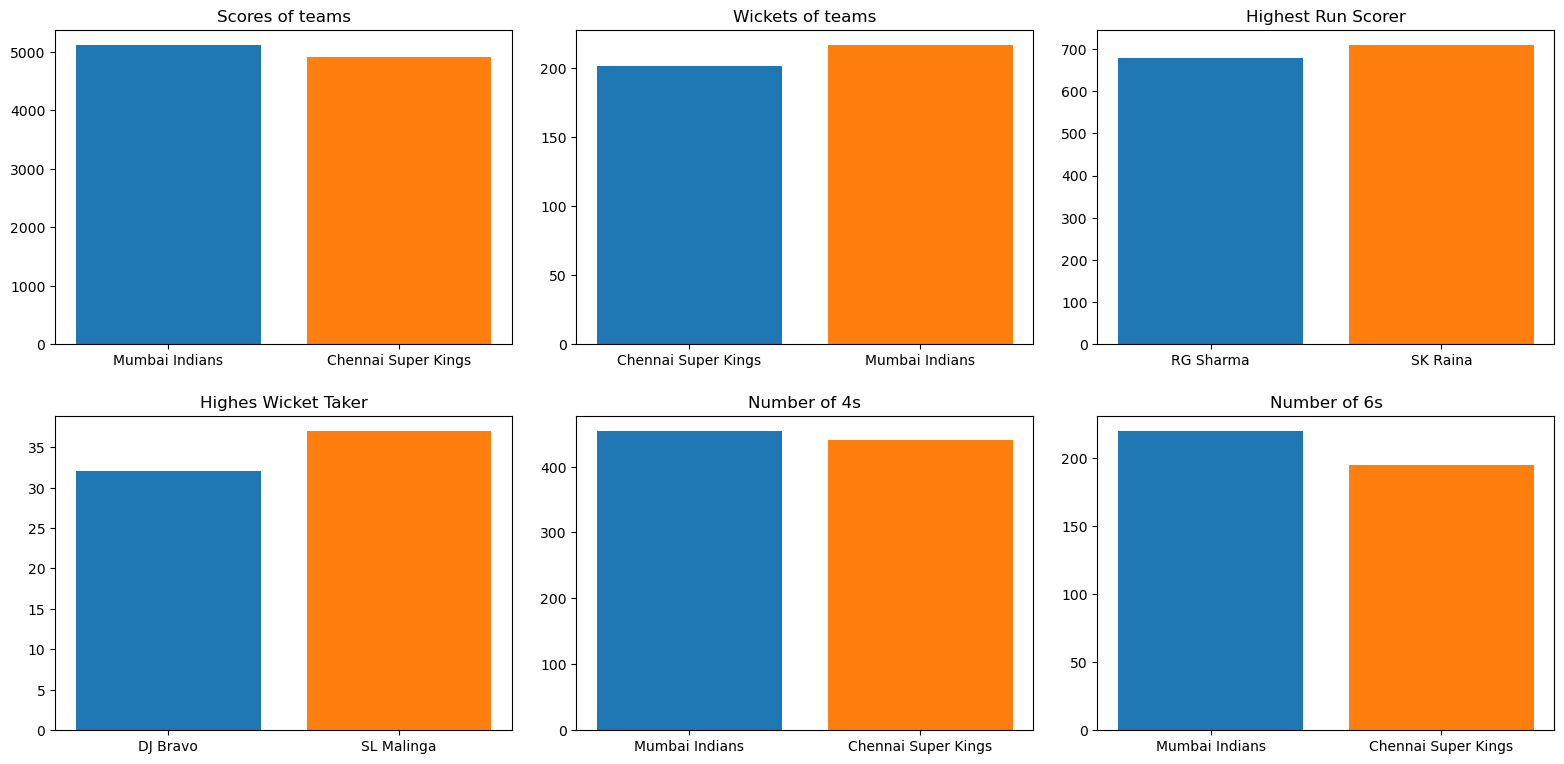

In [88]:
#Mumbai Indians vs Chennai Super Kings is the most anticipated match from the entire tournaments.
team_comparison('Mumbai Indians','Chennai Super Kings')

## The 16th edition of the tournament (IPL 2023) starts from March 31 and ends on May 28. 
### Defending champions Gujarat Titans will take on four-time champions Chennai Super Kings in IPL 2023 opener in Ahmedabad as announced by BCCI.
### Lets see their previous clashes!

Total Clashes : 490
**************************************************
Wins by Each Team :
Gujarat Titans    490
Name: WinningTeam, dtype: int64
**************************************************
Winning Chances (in %)
Gujarat Titans    100.0
Name: WinningTeam, dtype: float64
**************************************************
Gujarat Titans has the highest score of 170 runs in the clash.
Chennai Super Kings has the lowest score of 133 runs in the clash.
**************************************************
Gujarat Titans has scored 290 runs with 27 4s and 10 6s against Chennai Super Kings
While the top scorer is DA Miller with 109 runs.
Chennai Super Kings has taken 10 wickets against Gujarat Titans
While the top wicket taker is DJ Bravo with 3 wickets.
**************************************************
Chennai Super Kings has scored 290 runs with 18 4s and 13 6s against Gujarat Titans
While the top scorer is RD Gaikwad with 126 runs.
Gujarat Titans has taken 10 wickets against Chennai Su

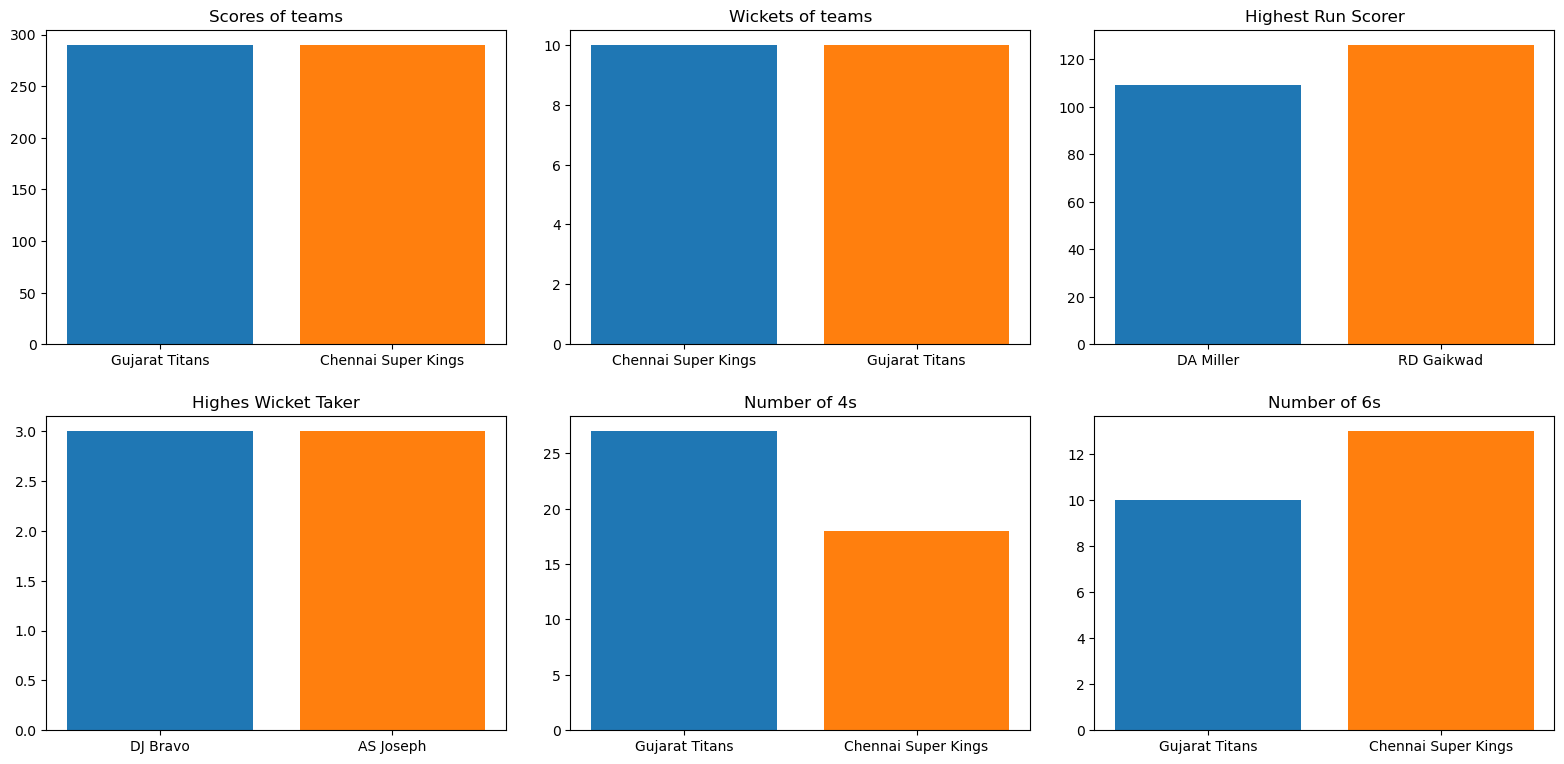

In [89]:
team_comparison('Gujarat Titans','Chennai Super Kings')

### It seems GT has higher chances of winning

# Find stastical information of any given team
#### Give name of the team to the function and returns its statistical information such as most MOM winner player, top scorer, highest wicket taker and win percentages against other teams.

In [90]:
def stats_info(team):
    team_df=edadf[(edadf.Team1==team)|(edadf.Team2==team)]
    mom_df=pd.DataFrame(team_df.describe(include=['O']))
    print(mom_df.Player_of_Match.iloc[2],'has won most ({}) player of the match awards for {}.'.format(mom_df.Player_of_Match.iloc[3], team))
    print('*'*100)
#     L is all Team names array
    L=edadf.BattingTeam.unique()
    L = L.tolist()
    L.remove(team)
#     the below is 2023 IPL teams
#     L= ['Royal Challengers Bangalore', 'Kolkata Knight Riders',
#        'Chennai Super Kings', 'Punjab Kings', 'Rajasthan Royals',
#        'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
#        'Lucknow Super Giants', 'Gujarat Titans']
    wins_dict={}
    for i in L:
        c2_df=team_df[(team_df.Team1==i)|(team_df.Team2==i)]
        team_won=len(c2_df[c2_df.WinningTeam==team])
        team_played=len(c2_df)
        try:
            win_ratio=team_won/team_played
        except Exception as e:
            win_ratio=0
        wins_dict[i]=(win_ratio*100)
    sns.barplot(x=list(wins_dict.keys()),y=list(wins_dict.values()))
    plt.title('Winning Percentage of {}'.format(team))
    plt.xlabel('Teams')
    plt.ylabel('Winning Percentage')
    plt.xticks(rotation=90)
    plt.show()
    print('*'*100)
    team_df2=edadf[(edadf.Team1==team)|(edadf.Team2==team)]
    xd=team_df2.groupby(['batter'], as_index=False)['batsman_run'].sum().sort_values('batsman_run', ascending=False).head(10)
    sns.barplot(data=xd, x='batter',y='batsman_run')
    plt.title('Top Run Scorers for {}'.format(team))
    plt.xlabel('Batsman')
    plt.ylabel('Runs Scored')
    plt.xticks(rotation=90)
    plt.show()
    print('*'*100)
    wd=team_df2[(team_df2.isWicketDelivery==1)&((team_df2.kind=='caught')|(team_df2.kind=='bowled')|(team_df2.kind=='lbw')|(team_df2.kind=='caught and bowled'))]
    #counting the values
    wdc=wd['bowler'].value_counts().head(10)
    sns.barplot(x=wdc.index,y=wdc)
    plt.title('Most Wicket Takers for {}'.format(team))
    plt.xlabel('Bolwer')
    plt.ylabel('No. of Wickets Taken')
    plt.xticks(rotation=90)
    plt.show()

DA Miller has won most (498) player of the match awards for Gujarat Titans.
****************************************************************************************************


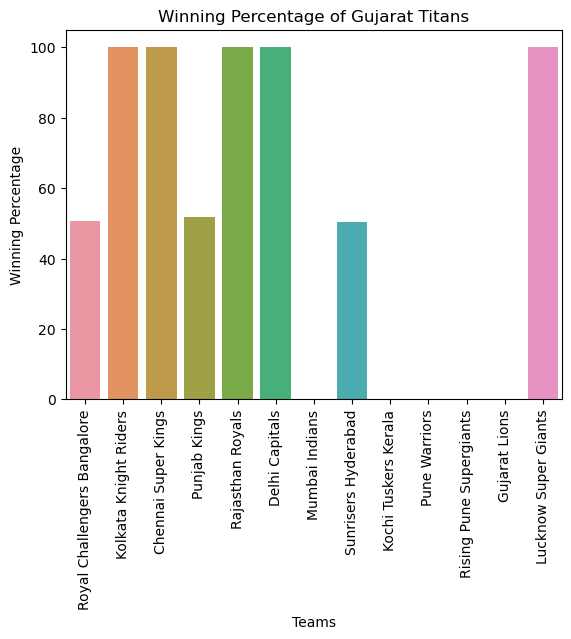

****************************************************************************************************


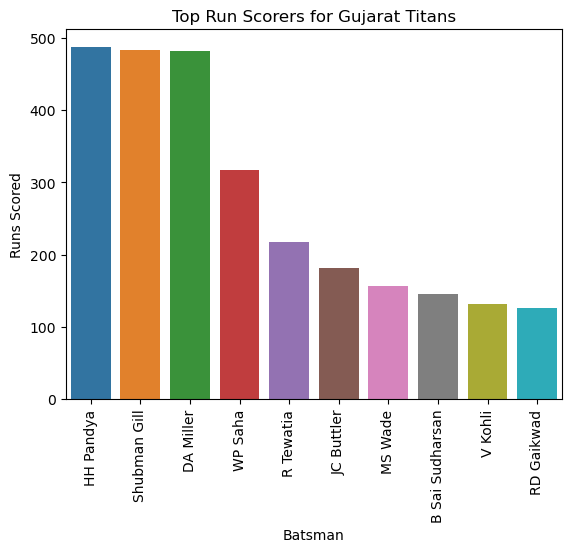

****************************************************************************************************


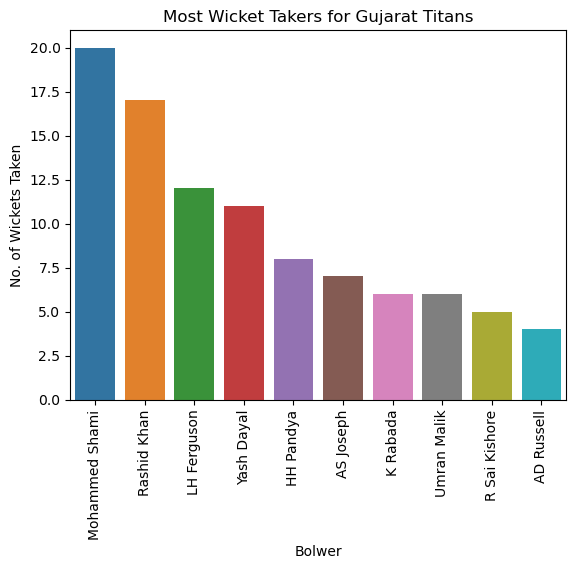

In [91]:
#Stats info of 2023 Defender Team against all Teams that played IPL till now
stats_info('Gujarat Titans')

# Best Partnerships in IPL using Network Analysis

In [92]:
pship = edadf[['ID','Season','BattingTeam', 'batter', 'non-striker', 'total_run']]
pship.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225954 entries, 0 to 225953
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           225954 non-null  int64 
 1   Season       225954 non-null  object
 2   BattingTeam  225954 non-null  object
 3   batter       225954 non-null  object
 4   non-striker  225954 non-null  object
 5   total_run    225954 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 20.1+ MB


In [93]:
# prepare dataframe for Delhi Capitals
df_dc = pship[pship['BattingTeam']=="Delhi Capitals"]

# df_dc['partners'] = [sorted([i,j]) for i,j in zip(df_dc['batter'], df_dc['non-striker'])]
# df_dc['partnership'] = ["".join(i) for i in df_dc['partners']]

list_df = [sorted([i,j]) for i,j in zip(df_dc['batter'], df_dc['non-striker'])]
df_dc['partnership'] = ["".join(i) for i in list_df]

df_dc.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Season,BattingTeam,batter,non-striker,total_run,partnership
583,335984,2008,Delhi Capitals,G Gambhir,S Dhawan,1,G GambhirS Dhawan
584,335984,2008,Delhi Capitals,G Gambhir,S Dhawan,4,G GambhirS Dhawan
585,335984,2008,Delhi Capitals,S Dhawan,G Gambhir,1,G GambhirS Dhawan
586,335984,2008,Delhi Capitals,G Gambhir,S Dhawan,1,G GambhirS Dhawan
587,335984,2008,Delhi Capitals,G Gambhir,S Dhawan,1,G GambhirS Dhawan


In [94]:
ps = df_dc.groupby(['ID','Season','partnership','batter','non-striker'])['total_run'].sum().reset_index()
ps

,ID,Season,partnership,batter,non-striker,total_run
0,335984,2008,G GambhirS Dhawan,G Gambhir,S Dhawan,53
1,335984,2008,G GambhirS Dhawan,S Dhawan,G Gambhir,59
2,335984,2008,G GambhirV Sehwag,G Gambhir,V Sehwag,8
3,335984,2008,G GambhirV Sehwag,V Sehwag,G Gambhir,12
4,335988,2008,G GambhirV Sehwag,G Gambhir,V Sehwag,12
...,...,...,...,...,...,...
2815,1304115,2022,PP ShawRR Pant,RR Pant,PP Shaw,1
2816,1304115,2022,R PowellRR Pant,R Powell,RR Pant,43
2817,1304115,2022,R PowellRR Pant,RR Pant,R Powell,32
2818,1304115,2022,RR PantSN Khan,RR Pant,SN Khan,9


In [95]:
# Getting the each player score in partnership
ps1 = df_dc.groupby(['ID','Season','partnership','batter'])['total_run'].sum().reset_index()
ps1.head(10)

# creating new dataframe to store player names and their scores
ptr = pd.DataFrame
ptr = ps1
ptr = ptr.rename(columns = {"batter":"Player1","total_run":"Score1"})
ptr = ptr.drop(['Season','ID','partnership'], axis=1)

# for getting non-striker data to store in ptr
ps2 = df_dc.groupby(['ID','Season','partnership','non-striker'])['total_run'].sum().reset_index()
ps2.set_index('ID')

# joing ptr on partnership with ps2
ptr = pd.concat([ptr, ps2], axis=1)
ptr = ptr.rename(columns = {"non-striker":"Player2","total_run":"Score2"})
ptr = ptr.drop(['Season','partnership','ID'], axis=1)
ptr = pd.concat([ps, ptr], axis=1)
ptr = ptr.drop(['Player1','Player2','total_run'], axis=1)
ptr = ptr.rename(columns = {"non-striker":"Player2","batter":"Player1"})
ptr
# Now we have got the needed 4 columns but there are duplicates for every partnership data
# which can be removed by drop.duplicates and keep first

,ID,Season,partnership,Player1,Player2,Score1,Score2
0,335984,2008,G GambhirS Dhawan,G Gambhir,S Dhawan,53,59
1,335984,2008,G GambhirS Dhawan,S Dhawan,G Gambhir,59,53
2,335984,2008,G GambhirV Sehwag,G Gambhir,V Sehwag,8,12
3,335984,2008,G GambhirV Sehwag,V Sehwag,G Gambhir,12,8
4,335988,2008,G GambhirV Sehwag,G Gambhir,V Sehwag,12,19
...,...,...,...,...,...,...,...
2815,1304115,2022,PP ShawRR Pant,RR Pant,PP Shaw,1,8
2816,1304115,2022,R PowellRR Pant,R Powell,RR Pant,43,32
2817,1304115,2022,R PowellRR Pant,RR Pant,R Powell,32,43
2818,1304115,2022,RR PantSN Khan,RR Pant,SN Khan,9,10


In [96]:
# Importing necessary libraries
import networkx as nx
from tqdm import tqdm
import warnings
from statistics import median

# empty list to store players name
p1 = []
p2 = []

# empty lists to store median of runs scored
r1 = []
r2 = []

for p in ptr[ptr.Season == '2022']['partnership'].unique():
    
    temp = ptr[ptr['partnership'] == p]
    p1.append(temp.iloc[0]['Player1'])
    p2.append(temp.iloc[0]['Player2'])
    
    a = []
    b = []
    
    # extract individual scores for both the players
    for index, row in temp.iterrows():
        # scores of player 1
        a.append(row['Score1'])
#         print(a)
#         print('4'*100)
        # scores of player 2
        b.append(row['Score2'])
#         print(b)

    # append median of scores    
    r1.append(median(a))
    r2.append(median(b))
    
# aggregated batting-partnership data across all the season or 2022
team_df = pd.DataFrame({'p1':p1, 'p2':p2, 'r1':r1, 'r2':r2})
team_df

,p1,p2,r1,r2
0,AR Patel,Lalit Yadav,10.5,10.5
1,Lalit Yadav,PP Shaw,20.0,20.0
2,R Powell,Lalit Yadav,13.0,13.0
3,Lalit Yadav,SN Thakur,15.0,15.0
4,Mandeep Singh,PP Shaw,5.0,5.0
5,PP Shaw,RR Pant,7.0,7.0
6,PP Shaw,TL Seifert,6.0,6.0
7,AR Patel,R Powell,8.0,8.0
8,KK Ahmed,Kuldeep Yadav,0.0,0.0
9,Kuldeep Yadav,Mustafizur Rahman,7.0,7.0


In [97]:
# compute the performance metric (overall contribution):
# find the leading batsman

# creating dummy columns
team_df['lead'] =team_df['p1']
team_df['follower'] = team_df['p2']

# main logic
team_df.loc[team_df['r1'] >= team_df['r2'], 'lead'] = team_df['p1']
team_df.loc[team_df['r1'] >= team_df['r2'], 'follower'] = team_df['p2']
team_df.loc[team_df['r1'] >= team_df['r2'], 'larger_score'] = team_df['r1']

team_df.loc[team_df['r1'] < team_df['r2'], 'lead'] = team_df['p2']
team_df.loc[team_df['r1'] < team_df['r2'], 'follower'] = team_df['p1']
team_df.loc[team_df['r1'] < team_df['r2'], 'larger_score'] = team_df['r2']

team_df['total_score'] = team_df['r1'] + team_df['r2']

# performance ratio
team_df['performance'] = team_df['larger_score']/(team_df['total_score']+0.01)

team_df.head()

,p1,p2,r1,r2,lead,follower,larger_score,total_score,performance
0,AR Patel,Lalit Yadav,10.5,10.5,AR Patel,Lalit Yadav,10.5,21.0,0.499762
1,Lalit Yadav,PP Shaw,20.0,20.0,Lalit Yadav,PP Shaw,20.0,40.0,0.499875
2,R Powell,Lalit Yadav,13.0,13.0,R Powell,Lalit Yadav,13.0,26.0,0.499808
3,Lalit Yadav,SN Thakur,15.0,15.0,Lalit Yadav,SN Thakur,15.0,30.0,0.499833
4,Mandeep Singh,PP Shaw,5.0,5.0,Mandeep Singh,PP Shaw,5.0,10.0,0.499500


### Constructing Network Analysis of DC for 2022 Season

In [98]:
# construct graph
G = nx.from_pandas_edgelist(team_df, "follower", "lead", ['performance'], create_using=nx.MultiDiGraph())

# get edge weights
_, wt = zip(*nx.get_edge_attributes(G, 'performance').items())

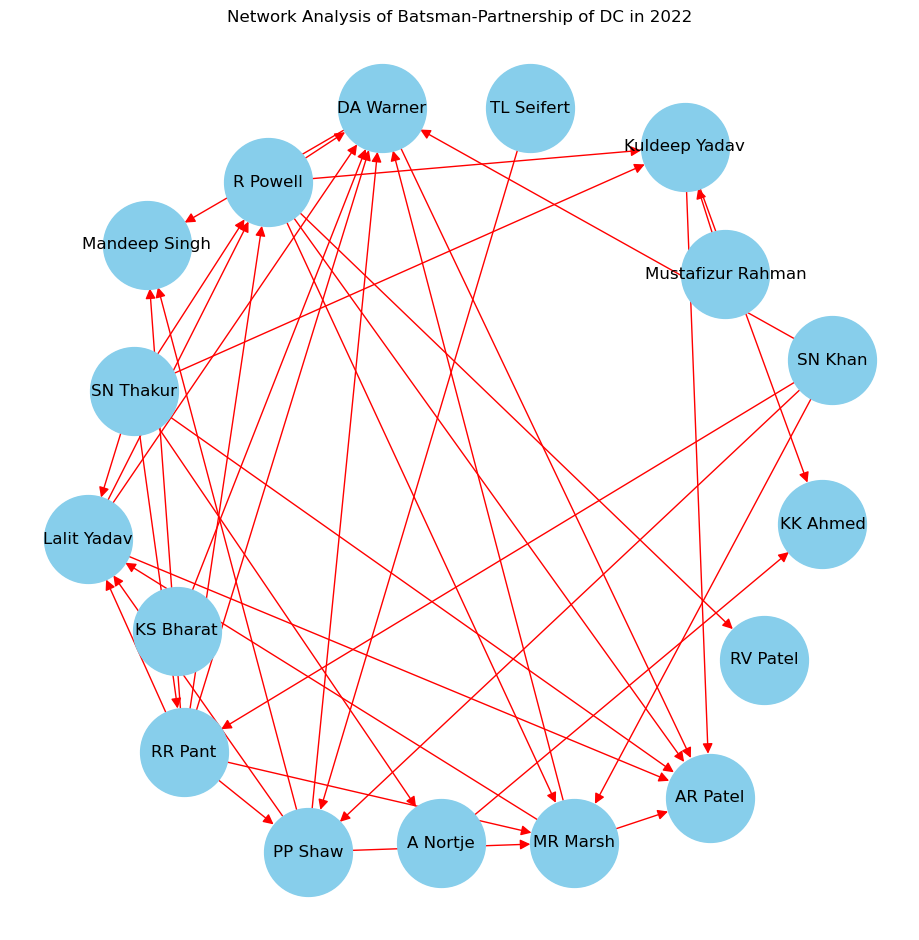

In [99]:
# plot graph
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G, k = 20, seed = 21) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G.edges(), edge_color='r', arrowsize=15)
plt.title('Network Analysis of Batsman-Partnership of DC in 2022')
plt.show()

In [100]:
# Let’s get the count of all the edges, node-wise:
list(G.degree)

[('Lalit Yadav', 7),
 ('AR Patel', 6),
 ('PP Shaw', 7),
 ('R Powell', 8),
 ('SN Thakur', 6),
 ('Mandeep Singh', 3),
 ('RR Pant', 8),
 ('TL Seifert', 1),
 ('Kuldeep Yadav', 5),
 ('KK Ahmed', 2),
 ('Mustafizur Rahman', 1),
 ('DA Warner', 9),
 ('SN Khan', 4),
 ('MR Marsh', 7),
 ('A Nortje', 2),
 ('KS Bharat', 1),
 ('RV Patel', 1)]

In [101]:
# Get the count of incoming edges, node-wise:

list(G.in_degree)

[('Lalit Yadav', 4),
 ('AR Patel', 6),
 ('PP Shaw', 3),
 ('R Powell', 3),
 ('SN Thakur', 0),
 ('Mandeep Singh', 3),
 ('RR Pant', 2),
 ('TL Seifert', 0),
 ('Kuldeep Yadav', 3),
 ('KK Ahmed', 2),
 ('Mustafizur Rahman', 0),
 ('DA Warner', 7),
 ('SN Khan', 0),
 ('MR Marsh', 4),
 ('A Nortje', 1),
 ('KS Bharat', 0),
 ('RV Patel', 1)]

### Above analysis depicts following observations for batting-partnership of DC in 2022 season:
### 1. Max incoming degree holder  - DA Warner (7 - In his partnership, 7 times he was the lead)
### 2. Total partnerships - DA Warner (9 - 9 times he was involved in partnerships)

### So, out of 9 times, 7 times he was the lead
### So, we need more partnerships and more leads in our team

## Defender Team's Batting Partnership across all seasons

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


Player Partnership Data 

          ID Season             partnership       Player1       Player2  \
0    1304050   2022     A Manohar-R Tewatia     A Manohar     R Tewatia   
1    1304050   2022     A Manohar-R Tewatia     R Tewatia     A Manohar   
2    1304050   2022       DA Miller-MS Wade     DA Miller       MS Wade   
3    1304050   2022       DA Miller-MS Wade       MS Wade     DA Miller   
4    1304050   2022     DA Miller-R Tewatia     DA Miller     R Tewatia   
..       ...    ...                     ...           ...           ...   
176  1312200   2022  HH Pandya-Shubman Gill  Shubman Gill     HH Pandya   
177  1312200   2022    MS Wade-Shubman Gill       MS Wade  Shubman Gill   
178  1312200   2022    MS Wade-Shubman Gill  Shubman Gill       MS Wade   
179  1312200   2022    Shubman Gill-WP Saha  Shubman Gill       WP Saha   
180  1312200   2022    Shubman Gill-WP Saha       WP Saha  Shubman Gill   

     Score1  Score2  
0        15       8  
1         8      15  
2      

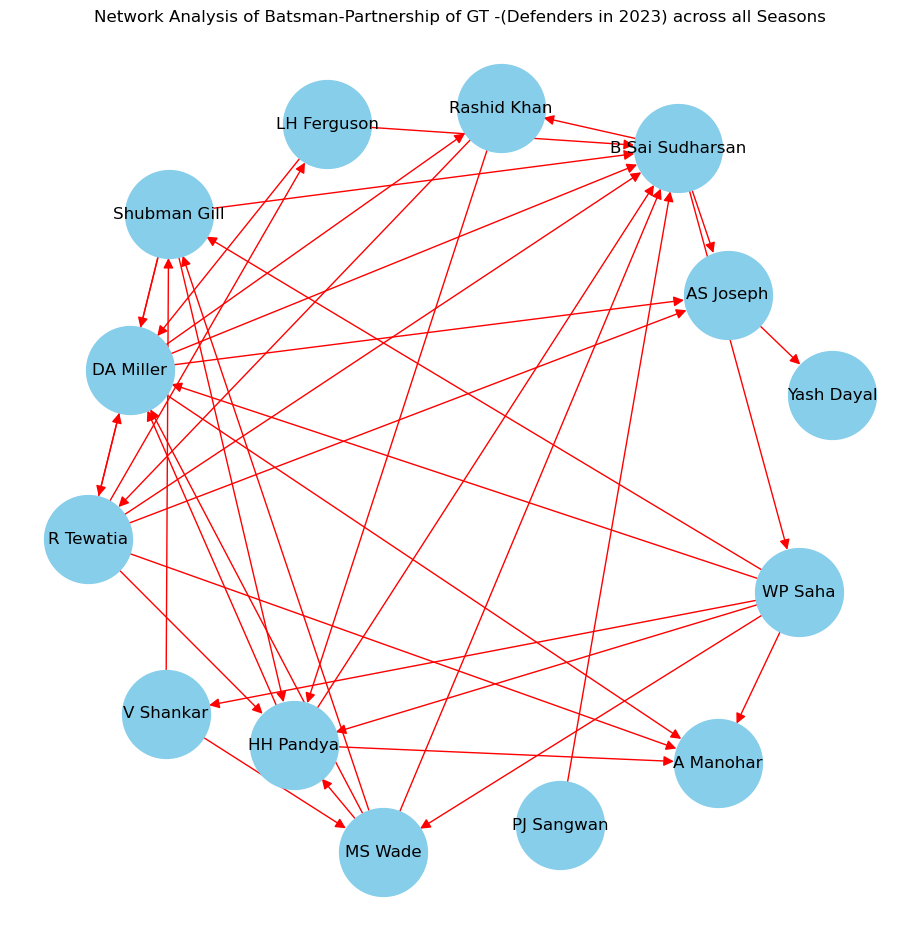

In [102]:
# prepare dataframe for the Team
# Change Team and Season here
df_dc = pship[pship['BattingTeam']=="Gujarat Titans"]

# df_dc['partners'] = [sorted([i,j]) for i,j in zip(df_dc['batter'], df_dc['non-striker'])]
# df_dc['partnership'] = ["".join(i) for i in df_dc['partners']]

list_df = [sorted([i,j]) for i,j in zip(df_dc['batter'], df_dc['non-striker'])]
df_dc['partnership'] = ["-".join(i) for i in list_df]

# getting player wise scores in partnership
ps = df_dc.groupby(['ID','Season','partnership','batter','non-striker'])['total_run'].sum().reset_index()

# Getting the each player score in partnership
ps1 = df_dc.groupby(['ID','Season','partnership','batter'])['total_run'].sum().reset_index()

# creating new dataframe to store player names and their scores
ptr = pd.DataFrame
ptr = ps1
ptr = ptr.rename(columns = {"batter":"Player1","total_run":"Score1"})
ptr = ptr.drop(['Season','ID','partnership'], axis=1)

# for getting non-striker data to store in ptr
ps2 = df_dc.groupby(['ID','Season','partnership','non-striker'])['total_run'].sum().reset_index()

# joing ptr on partnership with ps2
ptr = pd.concat([ptr, ps2], axis=1)
ptr = ptr.rename(columns = {"non-striker":"Player2","total_run":"Score2"})
ptr = ptr.drop(['Season','partnership','ID'], axis=1)
ptr = pd.concat([ps, ptr], axis=1)
ptr = ptr.drop(['Player1','Player2','total_run'], axis=1)
ptr = ptr.rename(columns = {"non-striker":"Player2","batter":"Player1"})
# Now we have got the needed 4 columns but there are duplicates for every partnership data
print('Player Partnership Data \n')
print(ptr,'\n')

# Importing necessary libraries
import networkx as nx
from tqdm import tqdm
import warnings
from statistics import median

# empty list to store players name
p1 = []
p2 = []

# empty lists to store median of runs scored
r1 = []
r2 = []

for p in ptr['partnership'].unique():
    
    temp = ptr[ptr['partnership'] == p]
    p1.append(temp.iloc[0]['Player1'])
    p2.append(temp.iloc[0]['Player2'])
    
    a = []
    b = []
    
    # extract individual scores for both the players
    for index, row in temp.iterrows():
        # scores of player 1
        a.append(row['Score1'])
        
        # scores of player 2
        b.append(row['Score2'])

    # append median of scores    
    r1.append(median(a))
    r2.append(median(b))

# aggregated batting-partnership data across all the season or 2022
team_df = pd.DataFrame({'p1':p1, 'p2':p2, 'r1':r1, 'r2':r2})

# compute the performance metric (overall contribution):
# find the leading batsman

# creating dummy columns
team_df['lead'] =team_df['p1']
team_df['follower'] = team_df['p2']

# main logic
team_df.loc[team_df['r1'] >= team_df['r2'], 'lead'] = team_df['p1']
team_df.loc[team_df['r1'] >= team_df['r2'], 'follower'] = team_df['p2']
team_df.loc[team_df['r1'] >= team_df['r2'], 'larger_score'] = team_df['r1']

team_df.loc[team_df['r1'] < team_df['r2'], 'lead'] = team_df['p2']
team_df.loc[team_df['r1'] < team_df['r2'], 'follower'] = team_df['p1']
team_df.loc[team_df['r1'] < team_df['r2'], 'larger_score'] = team_df['r2']

team_df['total_score'] = team_df['r1'] + team_df['r2']

# performance ratio
team_df['performance'] = team_df['larger_score']/(team_df['total_score']+0.01)
print('The Partnership Performarnce Data \n')
print(team_df,'\n')

# construct graph
G = nx.from_pandas_edgelist(team_df, "follower", "lead", ['performance'], create_using=nx.MultiDiGraph())

# get edge weights
_, wt = zip(*nx.get_edge_attributes(G, 'performance').items())

# plot graph
plt.figure(figsize=(9,9))
pos = nx.spring_layout(G, k = 20, seed = 21) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=4000, pos = pos, edgelist=G.edges(), edge_color='r', arrowsize=15)

# Change the title accordingly
plt.title('Network Analysis of Batsman-Partnership of GT -(Defenders in 2023) across all Seasons')
plt.show()

In [103]:
# Let’s get the count of all the edges, node-wise:
print('Number of Partnerships - All the Edges \n')
print(list(G.degree),'\n')
print('*'* 100)

# Get the count of incoming edges, node-wise:
print('Number of Leading Partnerships - Incoming Edges \n')
print(list(G.in_degree))

Number of Partnerships - All the Edges 

[('R Tewatia', 8), ('A Manohar', 4), ('MS Wade', 6), ('DA Miller', 10), ('HH Pandya', 8), ('Shubman Gill', 7), ('V Shankar', 3), ('Rashid Khan', 4), ('B Sai Sudharsan', 10), ('WP Saha', 7), ('AS Joseph', 4), ('LH Ferguson', 3), ('Yash Dayal', 1), ('PJ Sangwan', 1)] 

****************************************************************************************************
Number of Leading Partnerships - Incoming Edges 

[('R Tewatia', 2), ('A Manohar', 4), ('MS Wade', 2), ('DA Miller', 6), ('HH Pandya', 5), ('Shubman Gill', 3), ('V Shankar', 1), ('Rashid Khan', 2), ('B Sai Sudharsan', 7), ('WP Saha', 1), ('AS Joseph', 3), ('LH Ferguson', 1), ('Yash Dayal', 1), ('PJ Sangwan', 0)]


# ii) IPL Batting Analysis

# Most Run Scored by IPL Teams

In [104]:
edadf.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'byes', 'legbyes', 'noballs',
       'penalty', 'wides', 'BowlingTeam', 'current_score', 'runs_left',
       'balls_left', 'wickets_left', 'crr', 'rrr', 'result'],
      dtype='object')

In [105]:
edadf.groupby(['BattingTeam'])['total_run'].sum().sort_values(ascending=False)

BattingTeam
Mumbai Indians                 36663
Royal Challengers Bangalore    35190
Sunrisers Hyderabad            35106
Punjab Kings                   34557
Delhi Capitals                 34441
Kolkata Knight Riders          34201
Chennai Super Kings            33393
Rajasthan Royals               29681
Pune Warriors                   6358
Gujarat Lions                   4862
Rising Pune Supergiants         4533
Gujarat Titans                  2663
Lucknow Super Giants            2548
Kochi Tuskers Kerala            1901
Name: total_run, dtype: int64

### MI is at the top of the list.

# Most IPL Runs by a Batsman


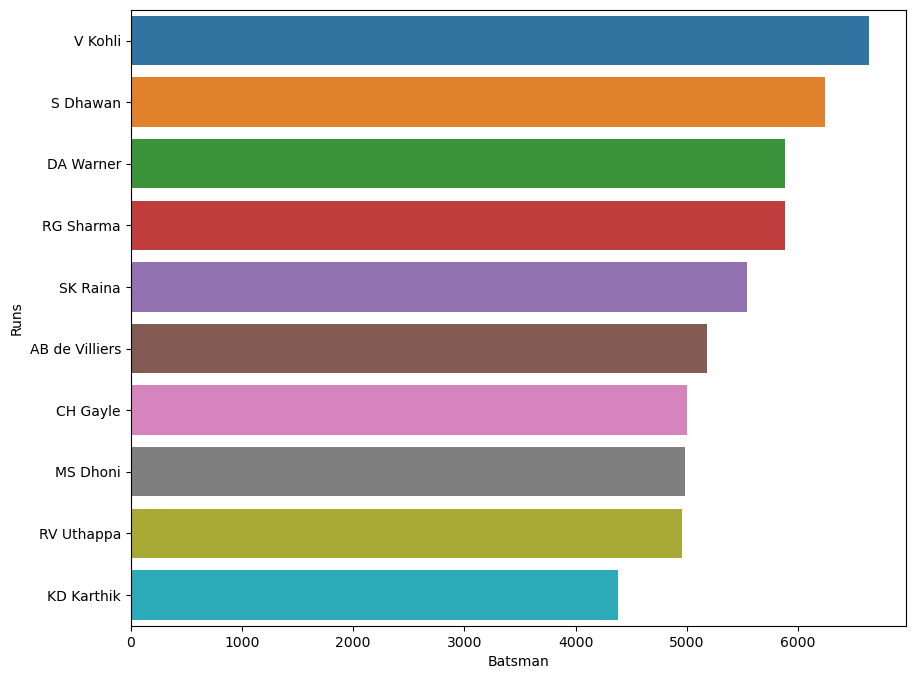

In [106]:
plt.figure(figsize=(10,8))
data = edadf.groupby(['batter'])['batsman_run'].sum().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.show()

### VK is the batting machine

# Avg Run by Teams in Powerplay


In [107]:
edadf[edadf['overs']<6].groupby(['ID','BattingTeam']).sum()['total_run'].groupby('BattingTeam').mean().sort_values(ascending=False)[2:]

BattingTeam
Rising Pune Supergiants        47.433333
Punjab Kings                   47.348624
Delhi Capitals                 46.785714
Sunrisers Hyderabad            46.766520
Gujarat Titans                 46.250000
Kolkata Knight Riders          46.237668
Mumbai Indians                 45.666667
Rajasthan Royals               45.356021
Chennai Super Kings            45.264423
Royal Challengers Bangalore    44.876106
Lucknow Super Giants           44.666667
Pune Warriors                  42.111111
Name: total_run, dtype: float64

### Punjab Kings has the highest average of 47.3

# Most IPL Century by a Player


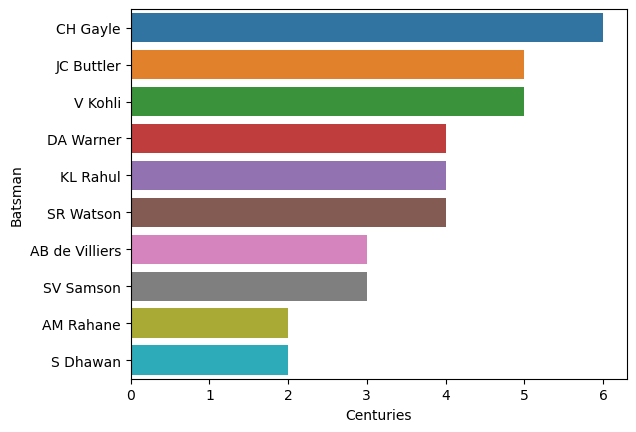

In [108]:
runs = edadf.groupby(['batter','ID'])['batsman_run'].sum()
data = runs[runs >= 100].droplevel(level=1).groupby('batter').count().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Centuries')
plt.ylabel('Batsman')
plt.show()

### Universe Boss Chris Gayle is at the top of the list

# Most IPL Fifty by Player

In [109]:
edadf.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'byes', 'legbyes', 'noballs',
       'penalty', 'wides', 'BowlingTeam', 'current_score', 'runs_left',
       'balls_left', 'wickets_left', 'crr', 'rrr', 'result'],
      dtype='object')

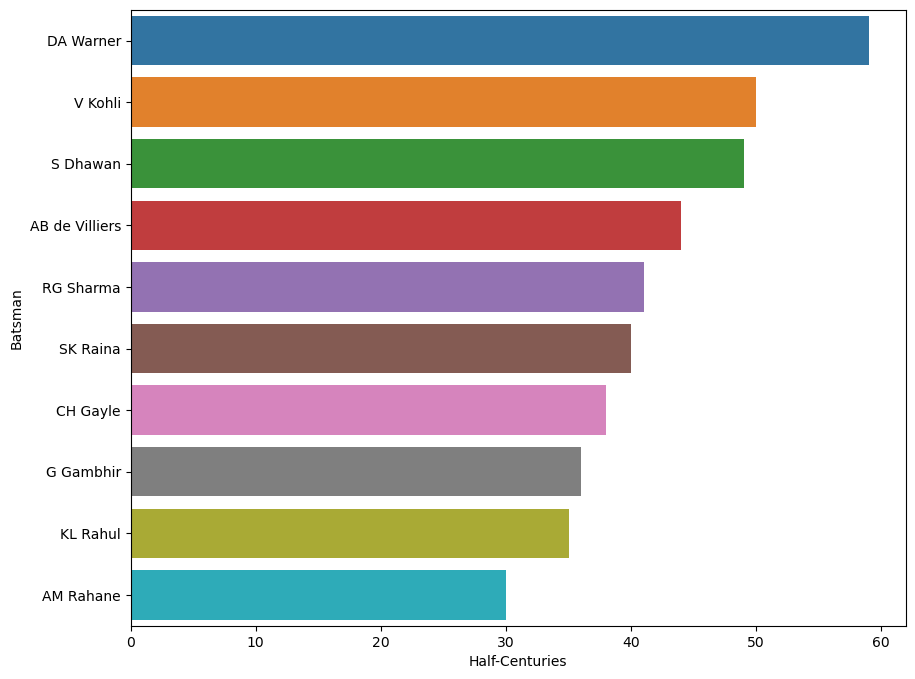

In [110]:
plt.figure(figsize=(10,8))
runs = edadf.groupby(['batter','Date'])['batsman_run'].sum()
data = runs[runs >= 50].droplevel(level=1).groupby('batter').count().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Half-Centuries')
plt.ylabel('Batsman')
plt.show()

### Warner is top in the list followed by Virat Kohli and Shikhar Dhawan

# Orange Cap Holder Each Season

In [111]:
data = edadf.groupby(['Season','batter'])['batsman_run'].sum().groupby('Season').max()
temp_df=pd.DataFrame(edadf.groupby(['Season','batter'])['batsman_run'].sum())
print("{0:10}{1:20}{2:30}".format("Season","Player","Runs"))
for season,run in data.items():
    player = temp_df.loc[season][temp_df.loc[season]['batsman_run'] == run].index[0]
    print(season,'\t ',player,'\t\t',run)

Season    Player              Runs                          
2008 	  SE Marsh 		 616
2009 	  ML Hayden 		 572
2010 	  SR Tendulkar 		 618
2011 	  CH Gayle 		 608
2012 	  CH Gayle 		 733
2013 	  MEK Hussey 		 733
2014 	  RV Uthappa 		 660
2015 	  DA Warner 		 562
2016 	  V Kohli 		 973
2017 	  DA Warner 		 641
2018 	  KS Williamson 		 735
2019 	  DA Warner 		 692
2020 	  KL Rahul 		 676
2021 	  RD Gaikwad 		 635
2022 	  JC Buttler 		 863


### Shaun Marsh became the first winner of the award in 2008

# Most Sixes in an IPL Inning


In [112]:
edadf[edadf['batsman_run'] == 6].groupby(['Date','batter']).count()['Season'].sort_values(ascending=False).droplevel(level=0)[:10]


batter
CH Gayle          17
CH Gayle          13
BB McCullum       13
AB de Villiers    12
CH Gayle          12
ST Jayasuriya     11
CH Gayle          11
M Vijay           11
AD Russell        11
SV Samson         10
Name: Season, dtype: int64

### Chris Gayle has hit the highest number of sixes in an inning

# Most Boundary (4s) hit by a Batsman


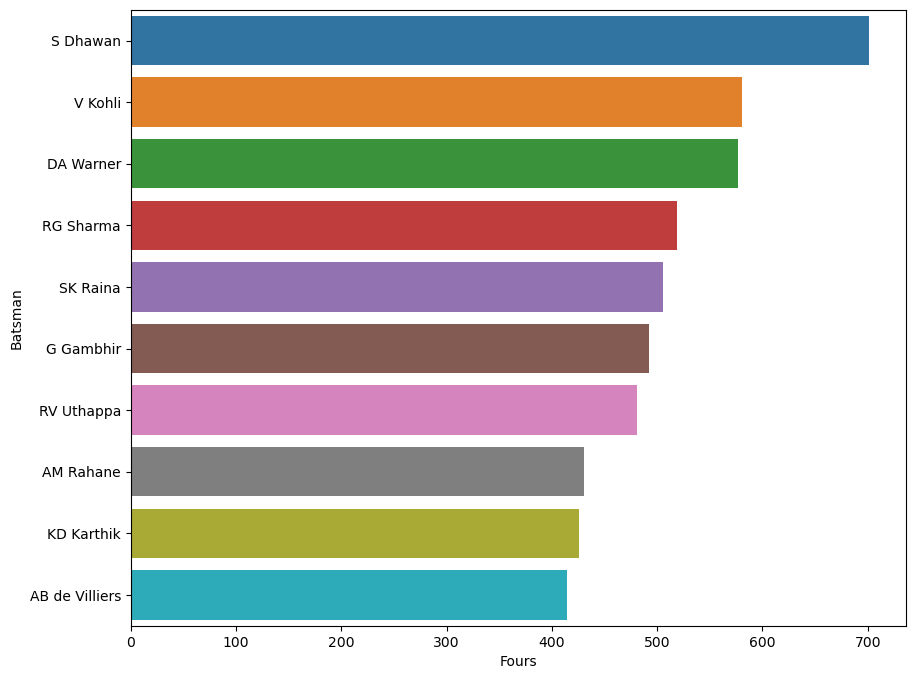

In [113]:
plt.figure(figsize=(10,8))
data = edadf[edadf['batsman_run'] == 4]['batter'].value_counts()[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Fours')
plt.ylabel('Batsman')
plt.show()

### The Indian Gabbar, Shikhar Dhawan is at the top of the list

# Most runs in an IPL season by Player


In [114]:
edadf.groupby(['batter','Season'])['batsman_run'].sum().sort_values(ascending=False)[:10]

batter          Season
V Kohli         2016      973
JC Buttler      2022      863
DA Warner       2016      848
KS Williamson   2018      735
CH Gayle        2012      733
MEK Hussey      2013      733
CH Gayle        2013      720
DA Warner       2019      692
AB de Villiers  2016      687
RR Pant         2018      684
Name: batsman_run, dtype: int64

### The run machine, Virat Kohli is at the top of the list

# No. of Sixes in IPL Seasons

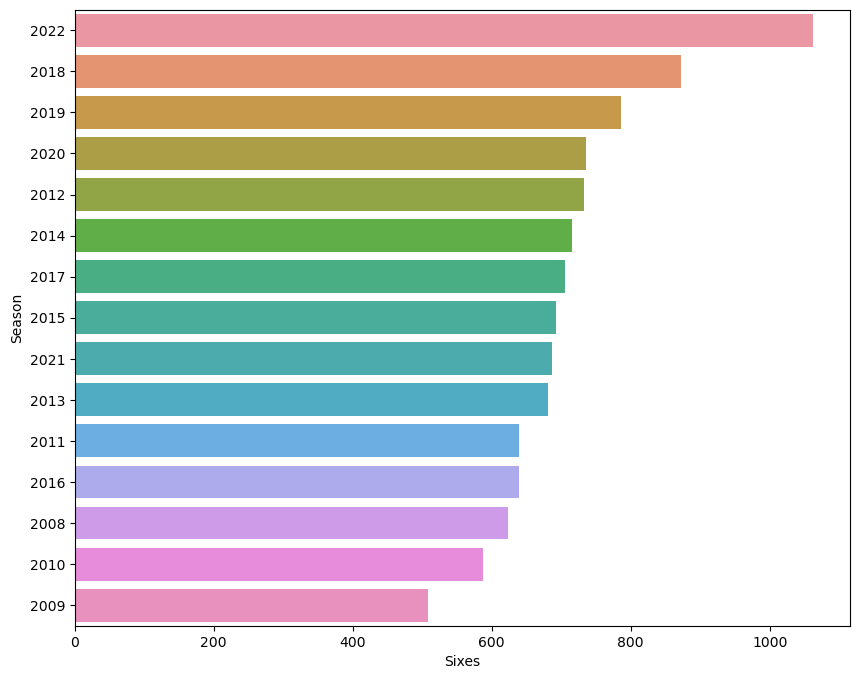

In [115]:
plt.figure(figsize=(10,8))
data = edadf[edadf['batsman_run'] == 6].groupby('Season').count()['ID'].sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Sixes')
plt.ylabel('Season')
plt.show()

### 2022 is the season with the most number of sixes hit.

# Highest Total by IPL Teams


In [116]:
edadf.groupby(['Date','BattingTeam']).sum()['total_run'].droplevel(level=0).sort_values(ascending=False)[:10]


BattingTeam
Royal Challengers Bangalore    263
Royal Challengers Bangalore    248
Chennai Super Kings            246
Kolkata Knight Riders          245
Chennai Super Kings            240
Mumbai Indians                 235
Royal Challengers Bangalore    235
Punjab Kings                   232
Kolkata Knight Riders          232
Delhi Capitals                 231
Name: total_run, dtype: int64

### Royal Challengers Bangalore is at the top of the list of highest run by a team

# Most IPL Sixes Hit by a batsman


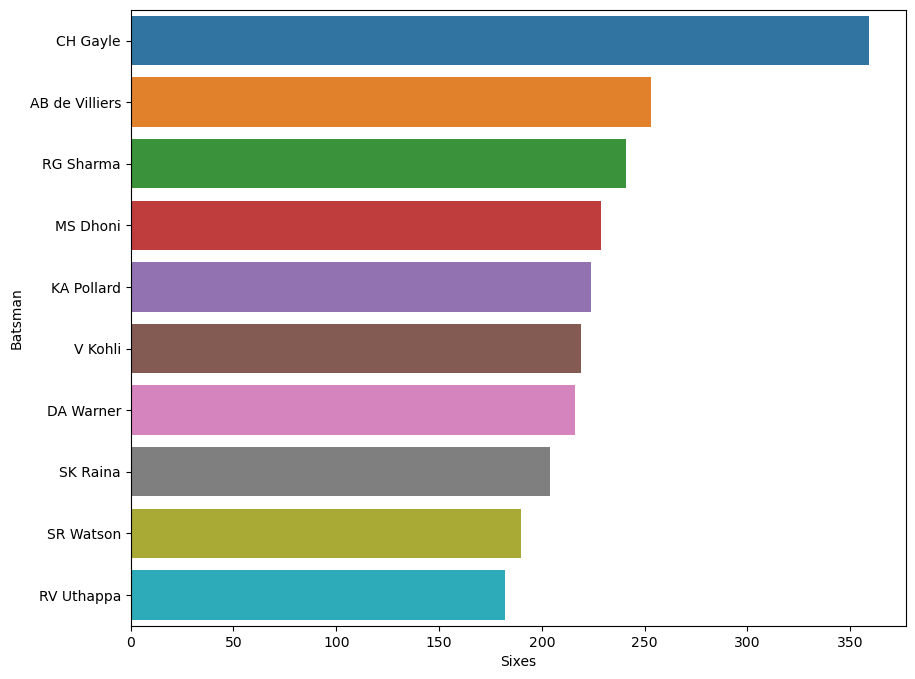

In [117]:
plt.figure(figsize=(10,8))
data = edadf[edadf['batsman_run'] == 6]['batter'].value_counts()[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Sixes')
plt.ylabel('Batsman')
plt.show()

### The universe Boss, Chris gale is at the top of the list

# Highest Individual IPL Score


In [118]:
edadf.groupby(['batter','Date'])['batsman_run'].sum().sort_values(ascending=False)[:10]


batter          Date      
CH Gayle        2013-04-23    175
BB McCullum     2008-04-18    158
Q de Kock       2022-05-18    140
AB de Villiers  2015-05-10    133
KL Rahul        2020-09-24    132
AB de Villiers  2016-05-14    129
RR Pant         2018-05-10    128
CH Gayle        2012-05-17    128
M Vijay         2010-04-03    127
DA Warner       2017-04-30    126
Name: batsman_run, dtype: int64

### Chris Gayle playing against Pune Warrior has hit the highest individual score in the 2013 season.

# iii) Bowling Statistics


# Most run conceded by a bowler in an inning


In [119]:
edadf.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'byes', 'legbyes', 'noballs',
       'penalty', 'wides', 'BowlingTeam', 'current_score', 'runs_left',
       'balls_left', 'wickets_left', 'crr', 'rrr', 'result'],
      dtype='object')

In [120]:
edadf.groupby(['bowler','Date'])['total_run'].sum().droplevel(level=1).sort_values(ascending=False)[:10]


bowler
Basil Thampi        70
Mujeeb Ur Rahman    66
Sandeep Sharma      66
I Sharma            66
PJ Cummins          65
UT Yadav            65
S Kaul              64
JR Hazlewood        64
AS Rajpoot          64
VR Aaron            63
Name: total_run, dtype: int64

### Basil Thampi playing for SRH against RCB in the 2008 season has conceded 70 runs

# Purple Cap Holders

In [121]:
edadf.kind  = edadf.kind.apply(str)

In [122]:
edadf.kind.unique()

array(['caught', 'nan', 'bowled', 'run out', 'lbw', 'stumped',
       'retired hurt', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [123]:
lst = 'caught,bowled,lbw,stumped,caught and bowled,hit wicket'
data = edadf[edadf['kind'].apply(lambda x: True if x in lst and x != ' ' else False)].groupby(['Season','bowler']).count()['ballnumber']
data=data.sort_values(ascending=False)[:30].sort_index(level=0)
val=0
lst=[]
print("{0:10}{1:20}{2:30}".format("Season","Player","Wickets"))
for (season,bowler),wicket in data.items():
    if season == val:
        lst.append(wicket)        
    else:
        print(season,'\t ',bowler,'\t\t',wicket)
        val = season
        lst=[]

Season    Player              Wickets                       
2008 	  Sohail Tanvir 		 22
2009 	  RP Singh 		 23
2011 	  SL Malinga 		 28
2012 	  M Morkel 		 25
2013 	  DJ Bravo 		 32
2014 	  MM Sharma 		 23
2015 	  DJ Bravo 		 26
2016 	  B Kumar 		 23
2017 	  B Kumar 		 26
2018 	  AJ Tye 		 24
2019 	  DL Chahar 		 22
2020 	  JJ Bumrah 		 29
2021 	  Avesh Khan 		 24
2022 	  K Rabada 		 23


### The bowler with the most wickets in the tournament during the course of the season would wear the Purple Cap

# Most IPL Wickets by a Bowler


In [124]:
lst = 'caught,bowled,lbw,stumped,caught and bowled,hit wicket'
edadf[edadf['kind'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowler'].value_counts()[:10]

DJ Bravo           183
SL Malinga         170
YS Chahal          166
A Mishra           166
R Ashwin           157
PP Chawla          157
B Kumar            154
SP Narine          152
Harbhajan Singh    150
JJ Bumrah          148
Name: bowler, dtype: int64

### Bravo is at the top of the list with 183 wickets

# Most Dot Ball by a Bowler


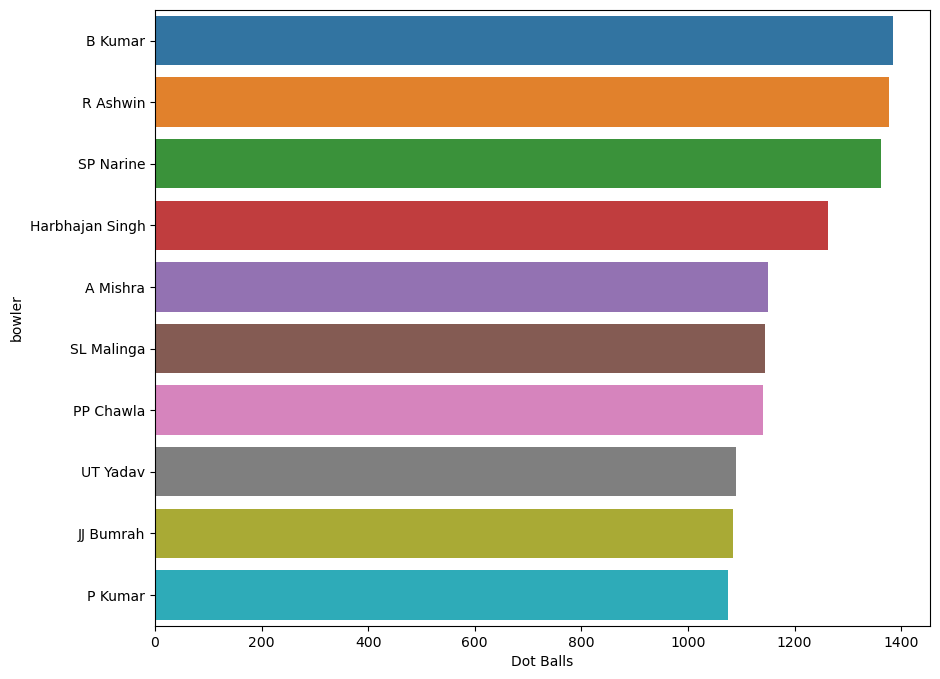

In [125]:
plt.figure(figsize=(10,8))
data = edadf[edadf['total_run'] == 0].groupby('bowler').count()['ID'].sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Dot Balls')
plt.ylabel('bowler')
plt.show()

### The Indian bowler Bhubaneshwar Kumar has bowled the most number of Dot balls

# Most Maiden over by a Bowler


In [126]:
data = edadf.groupby(['Date','bowler','overs'])['total_run'].sum()
data = data[data.values == 0].droplevel(level=[0,2])
data.index.value_counts()[:10]

P Kumar           12
B Kumar           11
IK Pathan          9
SL Malinga         8
DW Steyn           8
DJ Bravo           7
DS Kulkarni        7
JJ Bumrah          6
Sandeep Sharma     6
DL Chahar          6
Name: bowler, dtype: int64

### Indian right-hand medium-pacer bowler Praveen Kumar is at the top of the list

# Most Wickets by an IPL Team


In [127]:
edadf.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'innings', 'overs', 'ballnumber',
       'batter', 'bowler', 'non-striker', 'batsman_run', 'extras_run',
       'total_run', 'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'byes', 'legbyes', 'noballs',
       'penalty', 'wides', 'BowlingTeam', 'current_score', 'runs_left',
       'balls_left', 'wickets_left', 'crr', 'rrr', 'result'],
      dtype='object')

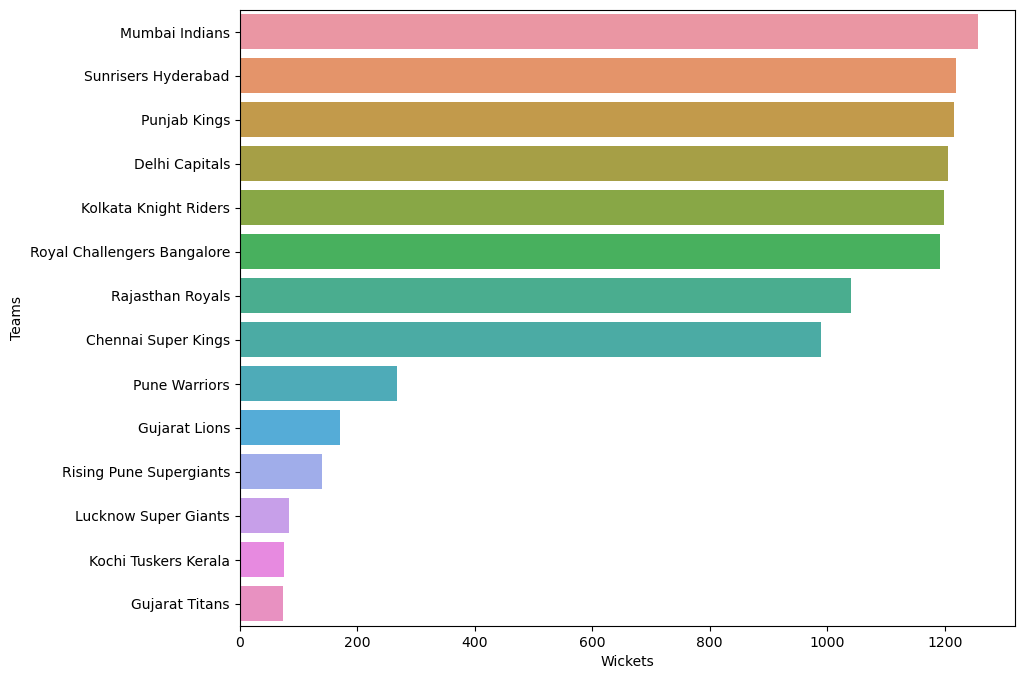

In [128]:
plt.figure(figsize=(10,8))
lst = 'caught,bowled,lbw,stumped,caught and bowled,hit wicket'
data = edadf[edadf['kind'].apply(lambda x: True if x in lst and x != ' ' else False)]['BattingTeam'].value_counts()
edadf.groupby(['BattingTeam'])['extras_run'].agg('sum').sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Wickets')
plt.ylabel('Teams')
plt.show()

### The Mumbai Indian has taken the most number of wickets in IPL

# Most No Balls by an IPL team


In [129]:
edadf.groupby(['BattingTeam'])['noballs'].agg('sum').sort_values(ascending=False)

BattingTeam
Royal Challengers Bangalore    118
Chennai Super Kings            116
Sunrisers Hyderabad            112
Rajasthan Royals               111
Mumbai Indians                 108
Delhi Capitals                  98
Kolkata Knight Riders           91
Punjab Kings                    86
Pune Warriors                   23
Gujarat Lions                   16
Kochi Tuskers Kerala            11
Rising Pune Supergiants          8
Gujarat Titans                   7
Lucknow Super Giants             3
Name: noballs, dtype: uint8

### Royal Challengers Bangalore has given most no balls

# Most No Balls by an IPL Bowler


In [130]:
edadf[edadf['noballs'] != 0]['bowler'].value_counts()[:10]

JJ Bumrah            29
S Sreesanth          23
UT Yadav             23
I Sharma             21
A Mishra             21
SL Malinga           18
M Prasidh Krishna    16
AB Dinda             14
SR Watson            13
RP Singh             13
Name: bowler, dtype: int64

### Indian bowler S Sreesanth has bowled the most number of no balls

# Most run given by a team in Extras


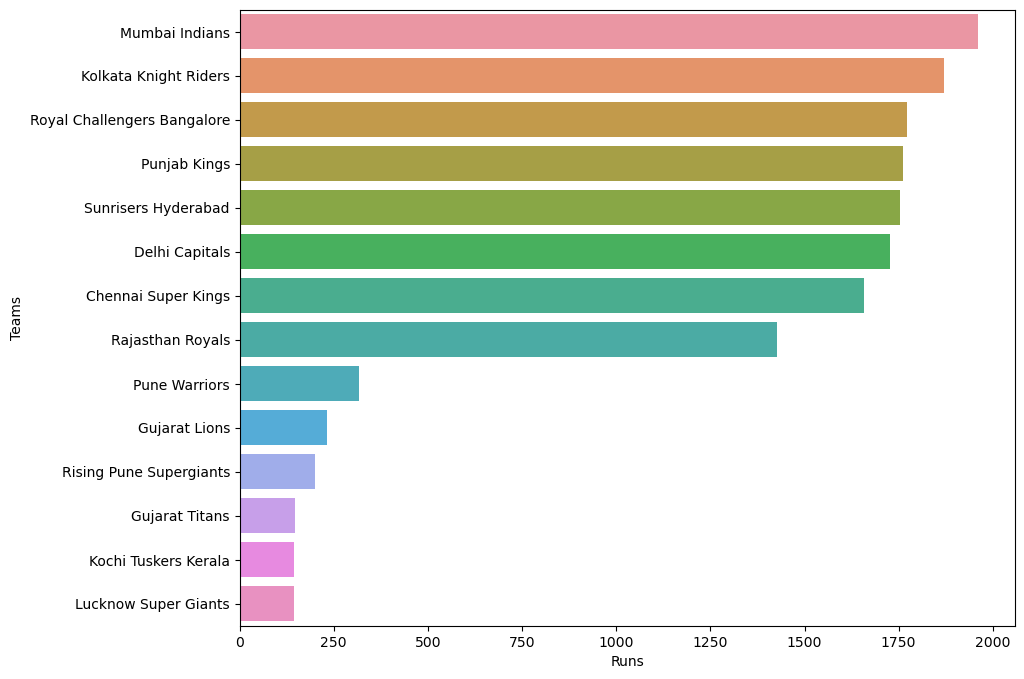

In [131]:
plt.figure(figsize=(10,8))
data = edadf.groupby(['BattingTeam'])['extras_run'].agg('sum').sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Runs')
plt.ylabel('Teams')
plt.show()

### Mumbai Indians have given the most number of extras

# Most Wides Conceded by an IPL team


In [132]:
edadf.groupby(['BattingTeam'])['wides'].agg('sum').sort_values(ascending=False)


BattingTeam
Mumbai Indians                 930.0
Kolkata Knight Riders          860.0
Royal Challengers Bangalore    823.0
Punjab Kings                   810.0
Delhi Capitals                 799.0
Sunrisers Hyderabad            798.0
Chennai Super Kings            772.0
Rajasthan Royals               660.0
Pune Warriors                  145.0
Gujarat Lions                  111.0
Rising Pune Supergiants        108.0
Lucknow Super Giants            79.0
Gujarat Titans                  69.0
Kochi Tuskers Kerala            61.0
Name: wides, dtype: float64

### Mumbai Indians has given most wides

## Hope you like the EDA. Kidnly comment your views and Follow for more